In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Nlp.version1/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# CatBoost kütüphanesini yüklemek için
!pip install catboost

# XGBoost kütüphanesini yüklemek için
!pip install xgboost

# Imbalanced-learn kütüphanesini yüklemek için (SMOTE, RandomOverSampler, RandomUnderSampler kullanmak için)
!pip install imbalanced-learn

# scikit-learn kütüphanesini yüklemek için
!pip install scikit-learn==1.4.2

!pip install numpy==1.26.4
# Pandas kütüphanesini yüklemek için
!pip install pandas

# Matplotlib kütüphanesini yüklemek için
!pip install matplotlib

# PyTorch kütüphanesini yüklemek için
!pip install torch

!pip  install openpyxl
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.2 MB/s eta 0:00:00


In [3]:
from functions.function import model_training
from functions.dataSampling import make_sampling

In [4]:
import gc
import os
import psutil

def clear_memory():
    # Çöp toplama işlemini manuel olarak çağır
    gc.collect()
    print("Cleared memory.")

    # Sistem RAM kullanımını kontrol et
    process = psutil.Process(os.getpid())
    memory_usage = process.memory_info().rss / (1024 * 1024)
    print(f"now memory used: {memory_usage:.2f} MB")


In [5]:
clear_memory()

Cleared memory.
now memory used: 393.81 MB


In [6]:
import warnings
warnings.filterwarnings('ignore')
import sklearn
print(sklearn.__version__)
import numpy as np
print(np.__version__)


#import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from collections import Counter
import xgboost as xgb

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier




1.4.2
1.26.4


In [7]:
try:
    data = pd.read_excel("/content/drive/MyDrive/Nlp.version1/temizlenmis_ve_islenmis_veriler.xlsx", engine='openpyxl')
except Exception as e:
    print(f"Dönüştürme sırasında bir hata oluştu: {e}")


#data = pd.read_csv("data_Llama.csv")
data = data.fillna("hiçbiri")
#data.drop(columns=['row_id'], inplace=True)# row index aynı indexte olan değerler,aynı değilleri.


data = data[["tweet","etiket"]]
print(data['etiket'].value_counts())

tweets = data['tweet']
labels = data["etiket"]


etiket
hiçbiri      7722
nefret       2336
saldırgan     166
Name: count, dtype: int64


In [8]:
print("Orijinal veri sınıf dağılımı:", Counter(labels))

Orijinal veri sınıf dağılımı: Counter({'hiçbiri': 7722, 'nefret': 2336, 'saldırgan': 166})


In [9]:
# Modeller--------------------------------------------------------------------------------------
xgb_model = xgb.XGBClassifier(tree_method='gpu_hist',max_depth=6, gpu_id=0, random_state=42, use_label_encoder=False,  n_estimators=50)
catB_model = CatBoostClassifier(iterations=50, learning_rate=0.1, depth=4, verbose=0)# (XGBoost ve CatBoost)
ann_mlpc_sgd = MLPClassifier(solver='sgd', alpha=1e-5, activation='relu',  hidden_layer_sizes=(20, 10, 5),max_iter=50, learning_rate='adaptive', random_state=7)# MLPClassifier (Yapay Sinir Ağı Sınıflandırıcı)
extraTC = ExtraTreesClassifier(n_estimators=100, random_state=7)# ExtraTreesClassifier (Ekstra Karar Ağaçları)


modelsAndNames =   [
       ('XGBoost', xgb_model),
       ('CatBoostC', catB_model),
       ('MLPC-sgd', ann_mlpc_sgd),
       ('ExtraTreesClassifier', extraTC)
   ]
#--------------------------------------------------------------------------------------

In [10]:

# Kategorik etiketleri sayısal verilere dönüştürme
label_mapping = {'nefret': 1, 'hiçbiri': 0, 'saldırgan': 2}
labels = data['etiket'].map(label_mapping)

#
result_dic ={}

len_labels = len(set(labels)) #for num_classes
# Veriyi eğitim ve test setine ayırma

In [11]:

X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)



In [12]:

#word unigram and bigram ,char bigram and trigram------------------------------

word_unigram_count = CountVectorizer(ngram_range=(1, 1) , analyzer='word')  # Kelime bazlı unigram
word_unigram_tfidf = TfidfVectorizer(ngram_range=(1, 1) ,analyzer='word')  # Kelime bazlı unigram TF-IDF

word_bigram_count = CountVectorizer(ngram_range=(2, 2), analyzer='word')  # Kelime bazlı bigram
word_bigram_tfidf = TfidfVectorizer(ngram_range=(2, 2), analyzer='word')  # Kelime bazlı bigram TF-IDF

# Karakter bazlı bigram tanımları
char_bigram_count = CountVectorizer(ngram_range=(2, 2), analyzer='char')  # Karakter bazlı bigram
char_bigram_tfidf = TfidfVectorizer(ngram_range=(2, 2), analyzer='char')  # Karakter bazlı bigram TF-IDF

# Karakter bazlı trigram tanımları
char_trigram_count = CountVectorizer(ngram_range=(3, 3), analyzer='char')  # Karakter bazlı trigram
char_trigram_tfidf = TfidfVectorizer(ngram_range=(3, 3), analyzer='char')  # Karakter bazlı trigram TF-IDF


Initial X_train shape: (8179, 98712)
Final X_train shape after applying thresholds: (7361, 98712)

Over-Sampling:
Epoch [1/50], Train Loss: 1.0672, Train Accuracy: 0.4772, Validation Loss: 1.1912, Validation Accuracy: 0.0328
Epoch [2/50], Train Loss: 0.8374, Train Accuracy: 0.6842, Validation Loss: 0.9113, Validation Accuracy: 0.6748
Epoch [3/50], Train Loss: 0.7416, Train Accuracy: 0.8840, Validation Loss: 0.8596, Validation Accuracy: 0.7081
Epoch [4/50], Train Loss: 0.5719, Train Accuracy: 0.9924, Validation Loss: 0.7441, Validation Accuracy: 0.8103
Epoch [5/50], Train Loss: 0.5549, Train Accuracy: 0.9986, Validation Loss: 0.7157, Validation Accuracy: 0.8367
Epoch [6/50], Train Loss: 0.5529, Train Accuracy: 0.9994, Validation Loss: 0.7145, Validation Accuracy: 0.8352
Epoch [7/50], Train Loss: 0.5524, Train Accuracy: 0.9995, Validation Loss: 0.7144, Validation Accuracy: 0.8352
Epoch [8/50], Train Loss: 0.5521, Train Accuracy: 0.9997, Validation Loss: 0.7143, Validation Accuracy: 0.833

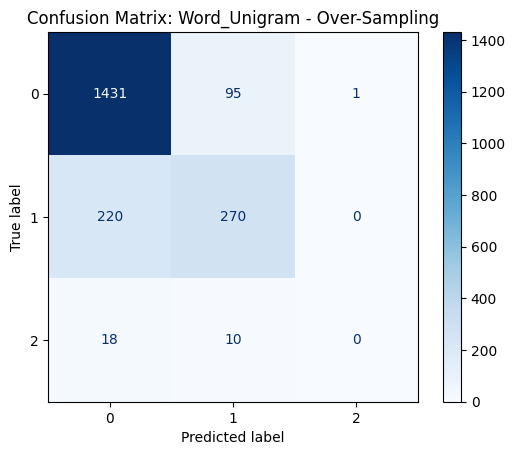

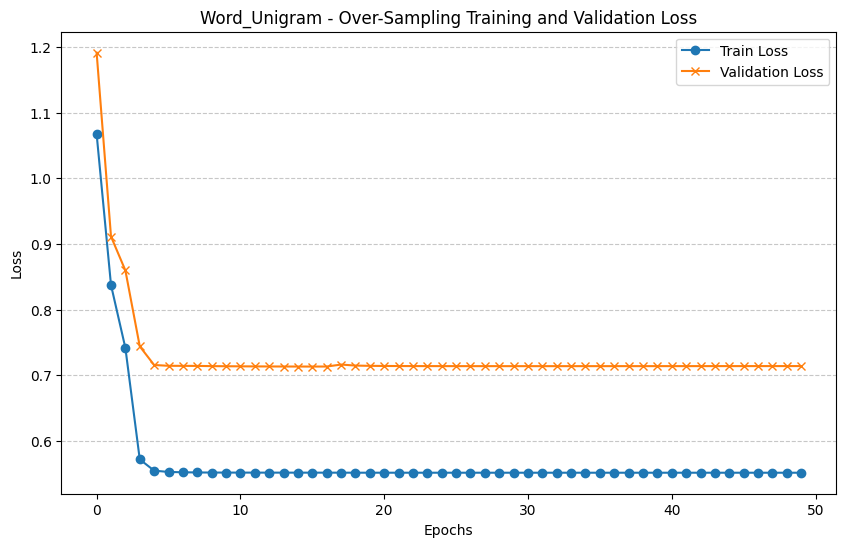


Under-Sampling:
Epoch [1/50], Train Loss: 1.1001, Train Accuracy: 0.3333, Validation Loss: 1.1051, Validation Accuracy: 0.2396
Epoch [2/50], Train Loss: 1.0981, Train Accuracy: 0.3333, Validation Loss: 1.1054, Validation Accuracy: 0.2396
Epoch [3/50], Train Loss: 1.0965, Train Accuracy: 0.3333, Validation Loss: 1.1058, Validation Accuracy: 0.2396
Epoch [4/50], Train Loss: 1.0946, Train Accuracy: 0.3359, Validation Loss: 1.1064, Validation Accuracy: 0.2396
Epoch [5/50], Train Loss: 1.0921, Train Accuracy: 0.3669, Validation Loss: 1.1070, Validation Accuracy: 0.2396
Epoch [6/50], Train Loss: 1.0889, Train Accuracy: 0.4729, Validation Loss: 1.1078, Validation Accuracy: 0.2367
Epoch [7/50], Train Loss: 1.0846, Train Accuracy: 0.6202, Validation Loss: 1.1085, Validation Accuracy: 0.2098
Epoch [8/50], Train Loss: 1.0790, Train Accuracy: 0.7235, Validation Loss: 1.1093, Validation Accuracy: 0.1462
Epoch [9/50], Train Loss: 1.0717, Train Accuracy: 0.7933, Validation Loss: 1.1103, Validation A

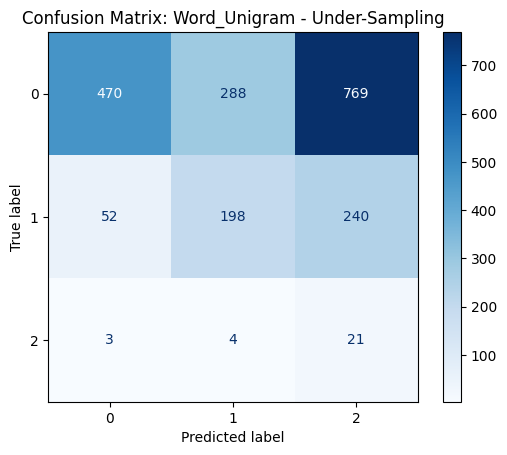

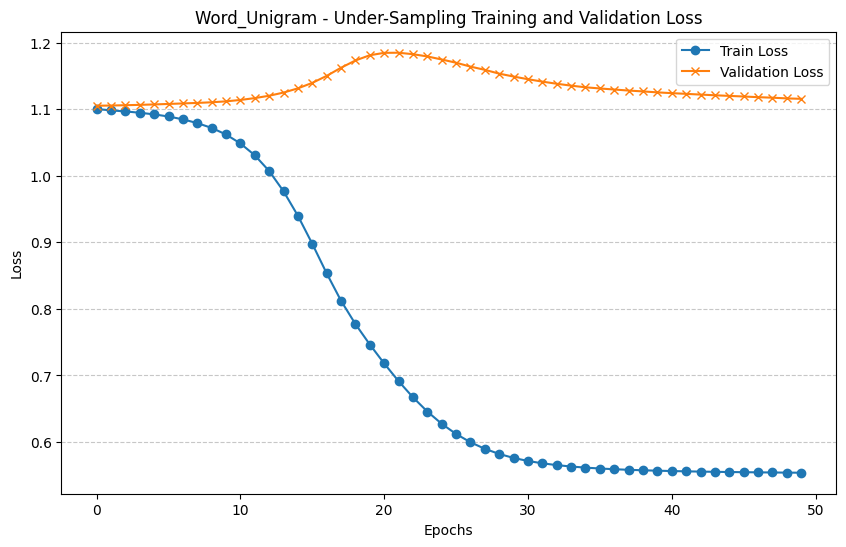


SMOTE:
Epoch [1/50], Train Loss: 1.0997, Train Accuracy: 0.4235, Validation Loss: 1.1447, Validation Accuracy: 0.2323
Epoch [2/50], Train Loss: 0.7916, Train Accuracy: 0.7927, Validation Loss: 1.1457, Validation Accuracy: 0.3056
Epoch [3/50], Train Loss: 0.5959, Train Accuracy: 0.9609, Validation Loss: 0.7709, Validation Accuracy: 0.7775
Epoch [4/50], Train Loss: 0.5564, Train Accuracy: 0.9976, Validation Loss: 0.7278, Validation Accuracy: 0.8225
Epoch [5/50], Train Loss: 0.5532, Train Accuracy: 0.9991, Validation Loss: 0.7279, Validation Accuracy: 0.8210
Epoch [6/50], Train Loss: 0.5523, Train Accuracy: 0.9996, Validation Loss: 0.7256, Validation Accuracy: 0.8244
Epoch [7/50], Train Loss: 0.5520, Train Accuracy: 0.9998, Validation Loss: 0.7248, Validation Accuracy: 0.8235
Epoch [8/50], Train Loss: 0.5519, Train Accuracy: 0.9998, Validation Loss: 0.7253, Validation Accuracy: 0.8240
Epoch [9/50], Train Loss: 0.5517, Train Accuracy: 0.9999, Validation Loss: 0.7253, Validation Accuracy: 

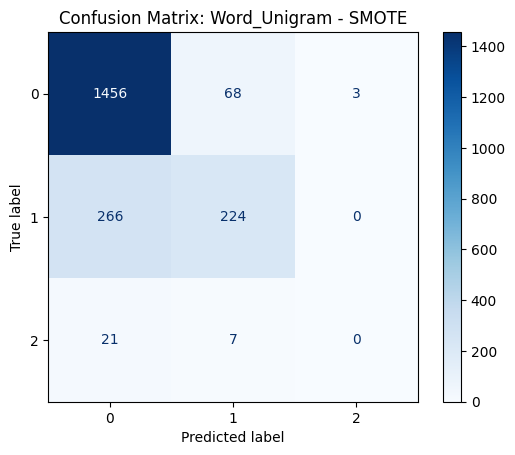

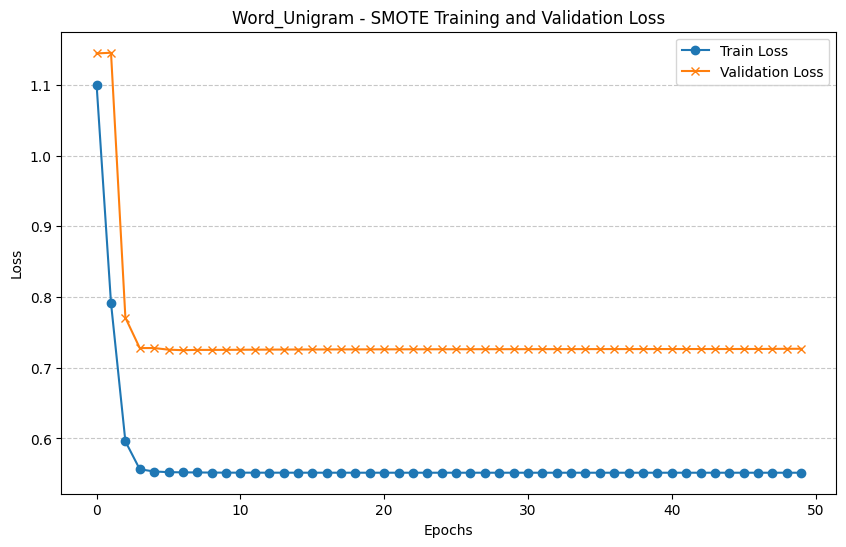

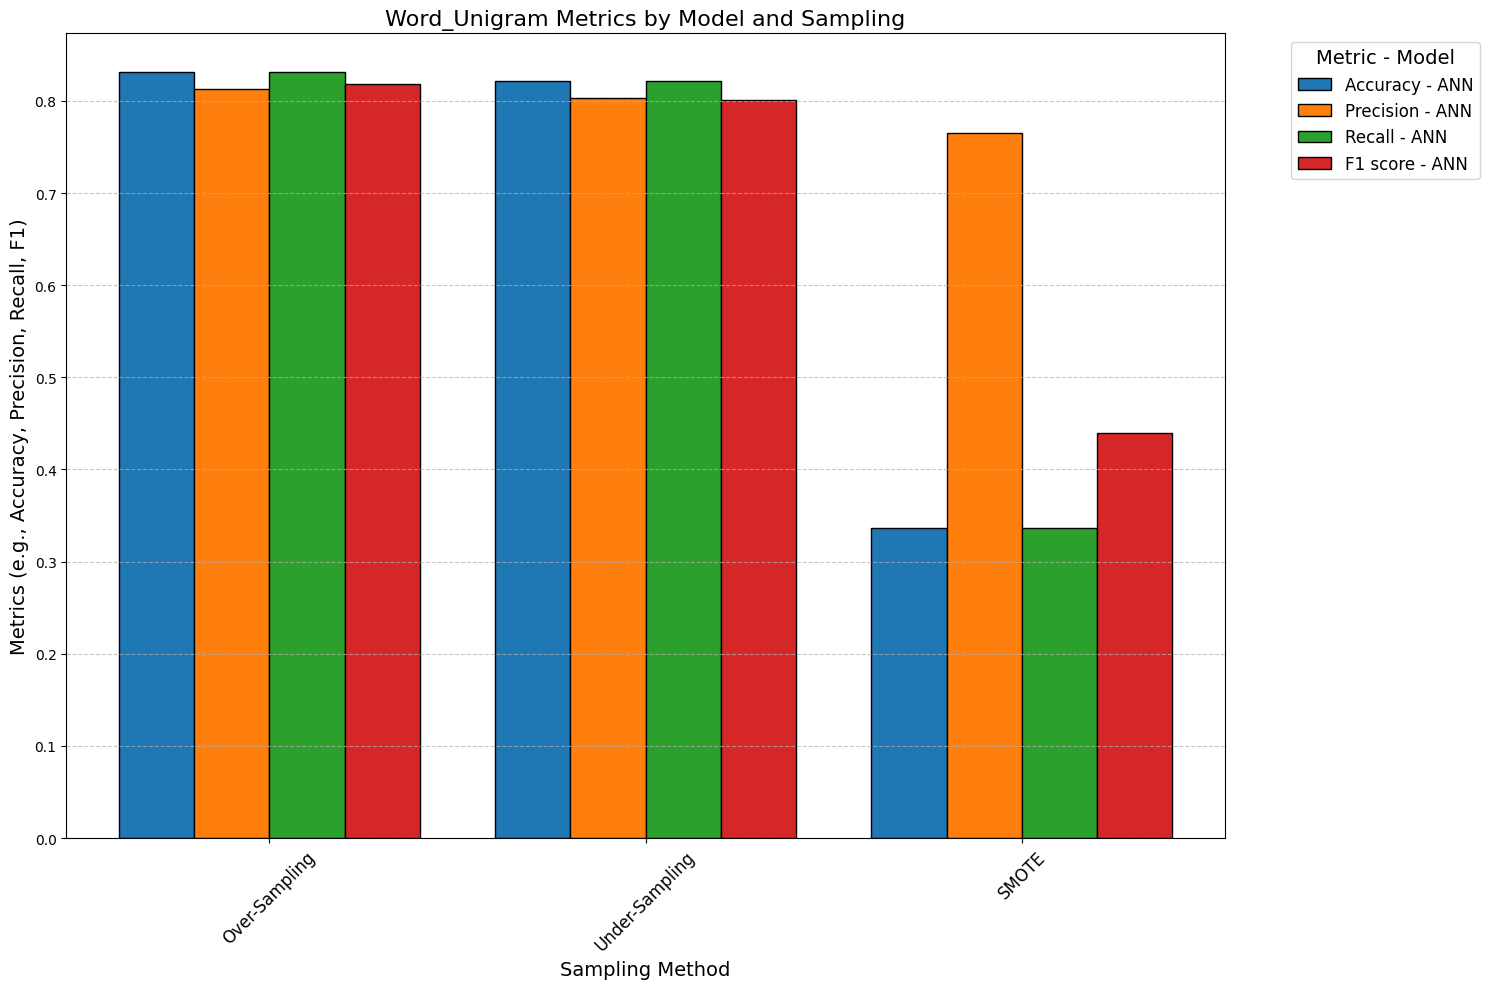

Results saved to models/Word_Unigram_results.csv


In [13]:
# word unigram-------------------------------------------
feature_union = FeatureUnion([
    ("word_unigram_count", word_unigram_count),
    ("word_unigram_tfidf", word_unigram_tfidf)
])


samplings,X_train_features,X_test_features,y_train_s=make_sampling(feature_union,X_train,X_test,y_train)


results_df = model_training(
                            "Word_Unigram",
                            X_train, X_test,
                            y_train_s, y_test,
                            samplings,
                            X_train_features,X_test_features,
                            len_labels
                            )

result_dic["Word_Unigram"] = results_df
del samplings, X_train_features, X_test_features, y_train_s

In [14]:
clear_memory()

Cleared memory.
now memory used: 579.63 MB


Initial X_train shape: (8179, 264102)
Final X_train shape after applying thresholds: (7356, 264102)

Over-Sampling:
Epoch [1/50], Train Loss: 1.0628, Train Accuracy: 0.3883, Validation Loss: 1.1379, Validation Accuracy: 0.2396
Epoch [2/50], Train Loss: 0.7996, Train Accuracy: 0.6724, Validation Loss: 1.1390, Validation Accuracy: 0.2391
Epoch [3/50], Train Loss: 0.7850, Train Accuracy: 0.7077, Validation Loss: 1.0227, Validation Accuracy: 0.5457
Epoch [4/50], Train Loss: 0.7939, Train Accuracy: 0.7701, Validation Loss: 0.8644, Validation Accuracy: 0.7951
Epoch [5/50], Train Loss: 0.5777, Train Accuracy: 0.9990, Validation Loss: 0.7630, Validation Accuracy: 0.7902
Epoch [6/50], Train Loss: 0.5531, Train Accuracy: 0.9999, Validation Loss: 0.7614, Validation Accuracy: 0.7839
Epoch [7/50], Train Loss: 0.5519, Train Accuracy: 0.9999, Validation Loss: 0.7644, Validation Accuracy: 0.7790
Epoch [8/50], Train Loss: 0.5516, Train Accuracy: 0.9999, Validation Loss: 0.7657, Validation Accuracy: 0.7

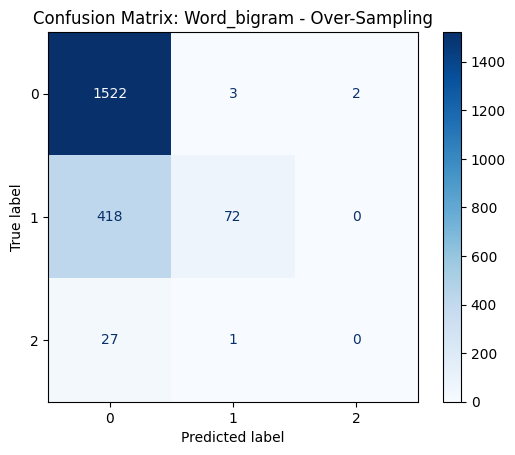

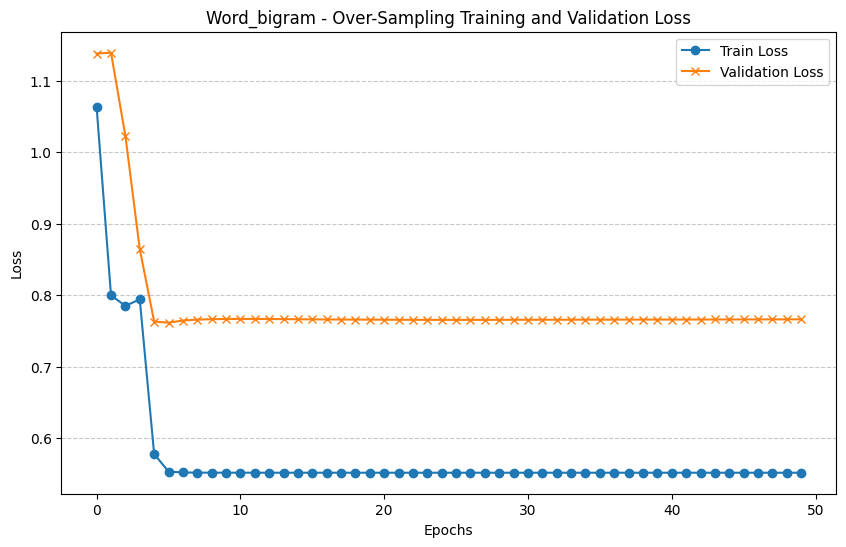


Under-Sampling:
Epoch [1/50], Train Loss: 1.0847, Train Accuracy: 0.3333, Validation Loss: 1.1457, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.0823, Train Accuracy: 0.3333, Validation Loss: 1.1461, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.0804, Train Accuracy: 0.3333, Validation Loss: 1.1467, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 1.0782, Train Accuracy: 0.3333, Validation Loss: 1.1473, Validation Accuracy: 0.0137
Epoch [5/50], Train Loss: 1.0751, Train Accuracy: 0.3333, Validation Loss: 1.1480, Validation Accuracy: 0.0137
Epoch [6/50], Train Loss: 1.0704, Train Accuracy: 0.3333, Validation Loss: 1.1487, Validation Accuracy: 0.0137
Epoch [7/50], Train Loss: 1.0631, Train Accuracy: 0.3333, Validation Loss: 1.1497, Validation Accuracy: 0.0137
Epoch [8/50], Train Loss: 1.0526, Train Accuracy: 0.3333, Validation Loss: 1.1510, Validation Accuracy: 0.0137
Epoch [9/50], Train Loss: 1.0376, Train Accuracy: 0.3333, Validation Loss: 1.1526, Validation A

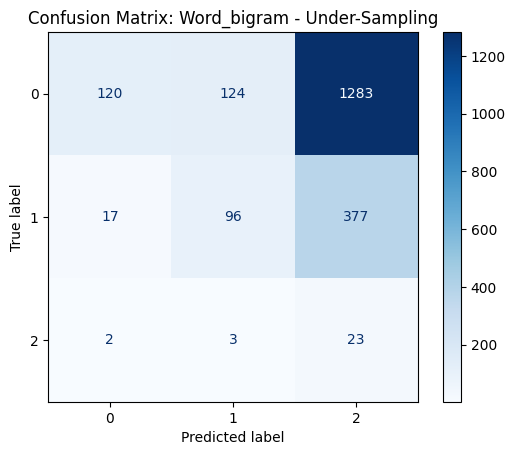

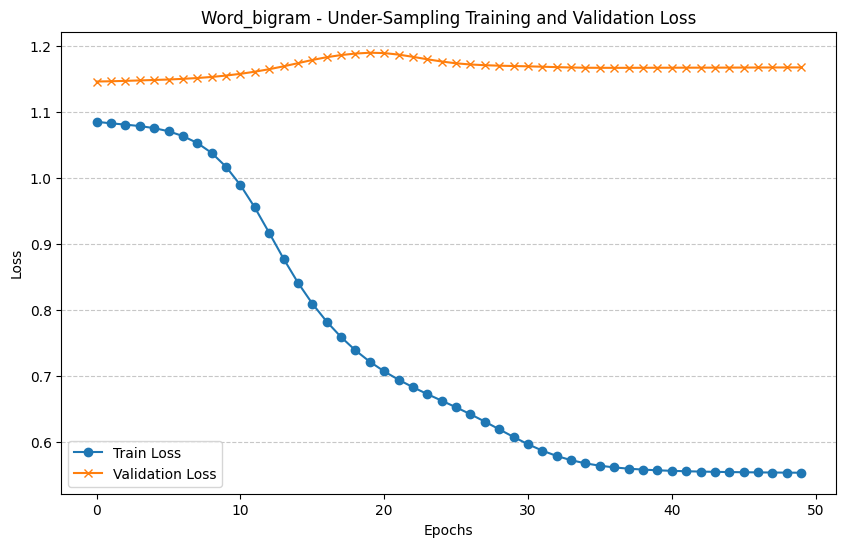


SMOTE:
Epoch [1/50], Train Loss: 1.0910, Train Accuracy: 0.3744, Validation Loss: 1.1475, Validation Accuracy: 0.2293
Epoch [2/50], Train Loss: 0.7110, Train Accuracy: 0.9224, Validation Loss: 0.7980, Validation Accuracy: 0.8000
Epoch [3/50], Train Loss: 0.5535, Train Accuracy: 0.9999, Validation Loss: 0.7605, Validation Accuracy: 0.8068
Epoch [4/50], Train Loss: 0.5519, Train Accuracy: 0.9999, Validation Loss: 0.7571, Validation Accuracy: 0.8064
Epoch [5/50], Train Loss: 0.5517, Train Accuracy: 0.9999, Validation Loss: 0.7569, Validation Accuracy: 0.8068
Epoch [6/50], Train Loss: 0.5516, Train Accuracy: 0.9999, Validation Loss: 0.7539, Validation Accuracy: 0.8049
Epoch [7/50], Train Loss: 0.5515, Train Accuracy: 0.9999, Validation Loss: 0.7522, Validation Accuracy: 0.8044
Epoch [8/50], Train Loss: 0.5515, Train Accuracy: 0.9999, Validation Loss: 0.7511, Validation Accuracy: 0.8039
Epoch [9/50], Train Loss: 0.5515, Train Accuracy: 0.9999, Validation Loss: 0.7503, Validation Accuracy: 

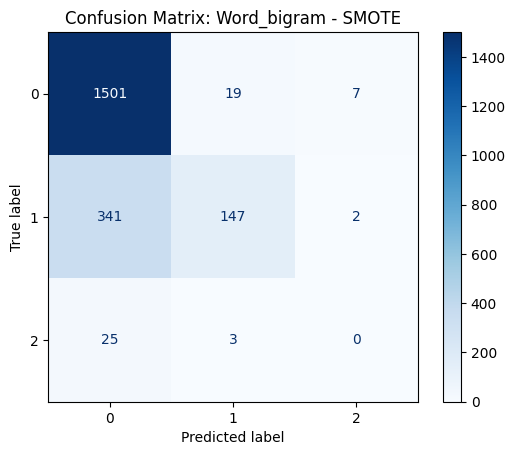

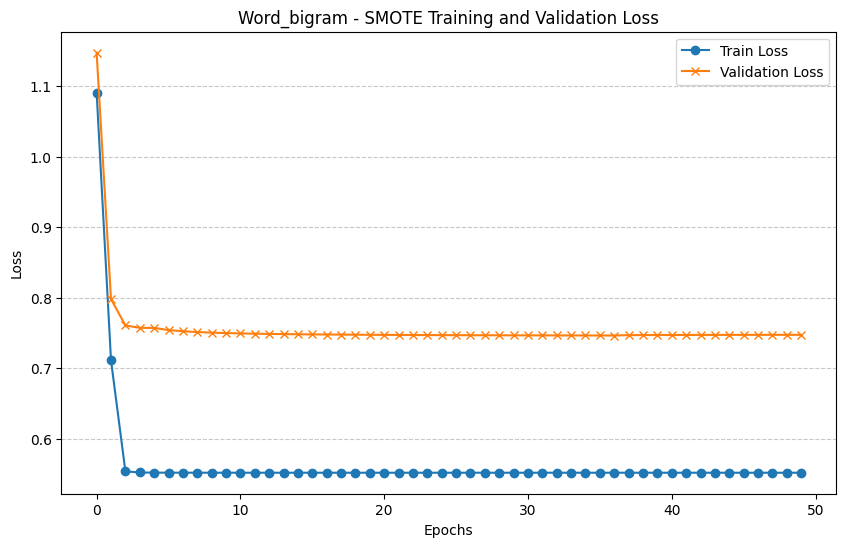

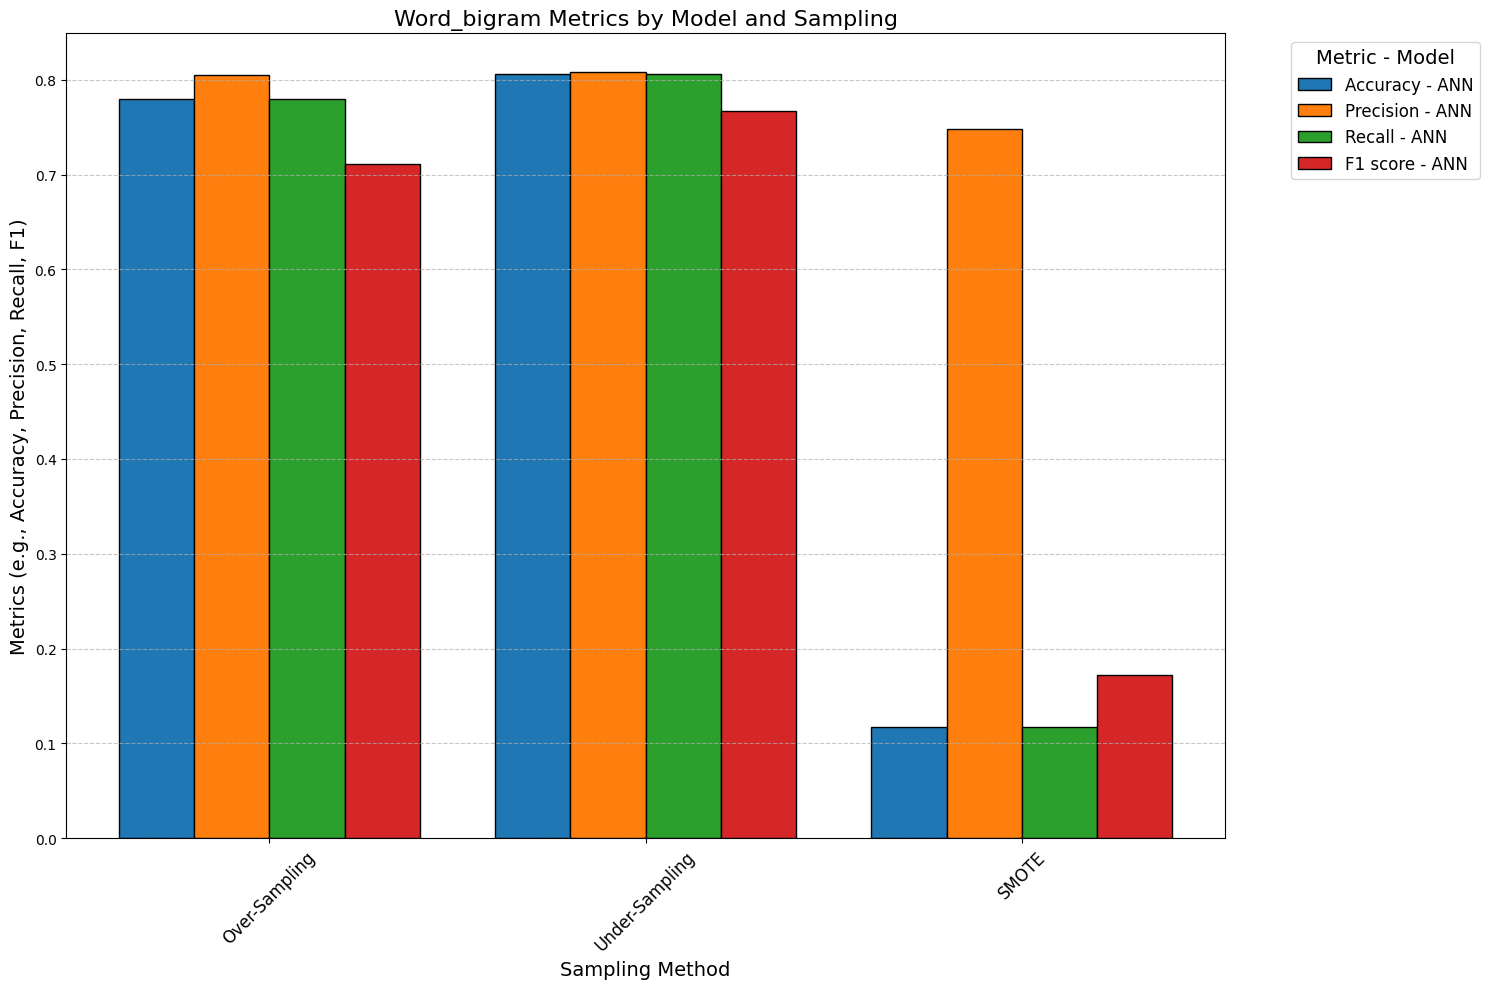

Results saved to models/Word_bigram_results.csv


In [15]:
# Word bigram-------------------------------------------
feature_union = FeatureUnion([
    ("word_bigram_count", word_bigram_count),
    ("word_bigram_tfidf", word_bigram_tfidf)
])

samplings,X_train_features,X_test_features,y_train_s=make_sampling(feature_union,X_train,X_test,y_train)


results_df = model_training(
                            "Word_bigram",
                              X_train, X_test,
                              y_train_s, y_test,
                              samplings,
                              X_train_features,X_test_features,
                              len_labels
                              )
result_dic["Word_bigram"] = results_df
del samplings, X_train_features, X_test_features, y_train_s

In [16]:
clear_memory()

Cleared memory.
now memory used: 638.60 MB


Initial X_train shape: (8179, 3664)
Final X_train shape after applying thresholds: (7361, 3664)

Over-Sampling:
Epoch [1/50], Train Loss: 1.1344, Train Accuracy: 0.4501, Validation Loss: 1.3803, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.1385, Train Accuracy: 0.2866, Validation Loss: 1.3841, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.1988, Train Accuracy: 0.2454, Validation Loss: 1.1187, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 1.1221, Train Accuracy: 0.2146, Validation Loss: 1.1001, Validation Accuracy: 0.0196
Epoch [5/50], Train Loss: 1.1326, Train Accuracy: 0.3665, Validation Loss: 1.1048, Validation Accuracy: 0.0137
Epoch [6/50], Train Loss: 1.0835, Train Accuracy: 0.3315, Validation Loss: 1.3087, Validation Accuracy: 0.0137
Epoch [7/50], Train Loss: 1.1429, Train Accuracy: 0.1107, Validation Loss: 1.1028, Validation Accuracy: 0.2362
Epoch [8/50], Train Loss: 1.0885, Train Accuracy: 0.4412, Validation Loss: 1.4265, Validation Accuracy: 0.0137


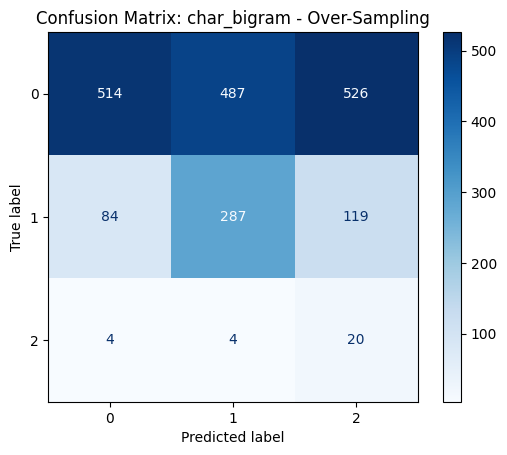

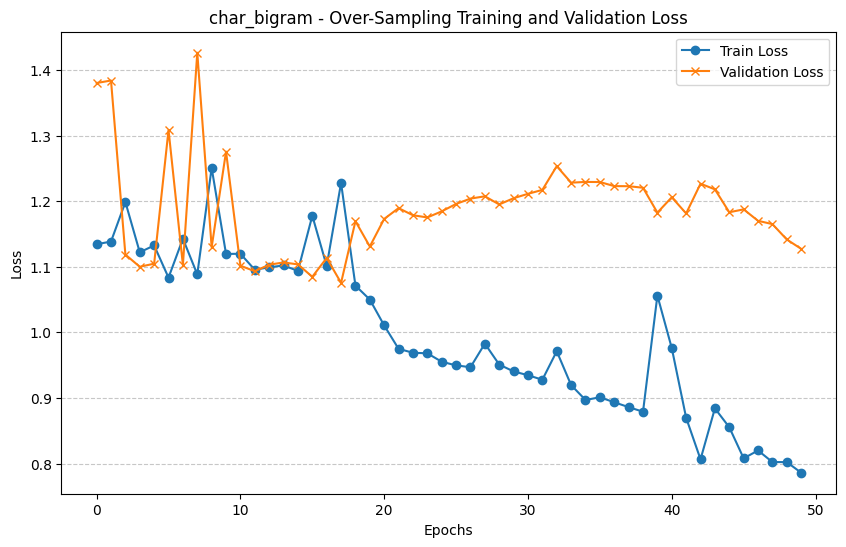


Under-Sampling:
Epoch [1/50], Train Loss: 1.1065, Train Accuracy: 0.3333, Validation Loss: 1.1129, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.0999, Train Accuracy: 0.3333, Validation Loss: 1.1112, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.0987, Train Accuracy: 0.3333, Validation Loss: 1.1101, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 1.0978, Train Accuracy: 0.3333, Validation Loss: 1.1095, Validation Accuracy: 0.0137
Epoch [5/50], Train Loss: 1.0970, Train Accuracy: 0.3333, Validation Loss: 1.1090, Validation Accuracy: 0.0137
Epoch [6/50], Train Loss: 1.0962, Train Accuracy: 0.3333, Validation Loss: 1.1085, Validation Accuracy: 0.0166
Epoch [7/50], Train Loss: 1.0953, Train Accuracy: 0.3438, Validation Loss: 1.1081, Validation Accuracy: 0.0254
Epoch [8/50], Train Loss: 1.0943, Train Accuracy: 0.3516, Validation Loss: 1.1075, Validation Accuracy: 0.0411
Epoch [9/50], Train Loss: 1.0933, Train Accuracy: 0.3646, Validation Loss: 1.1067, Validation A

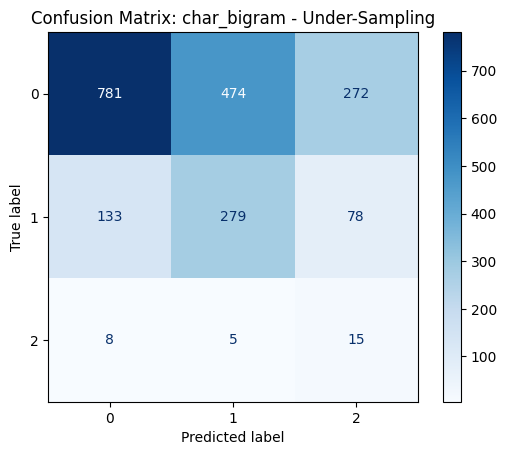

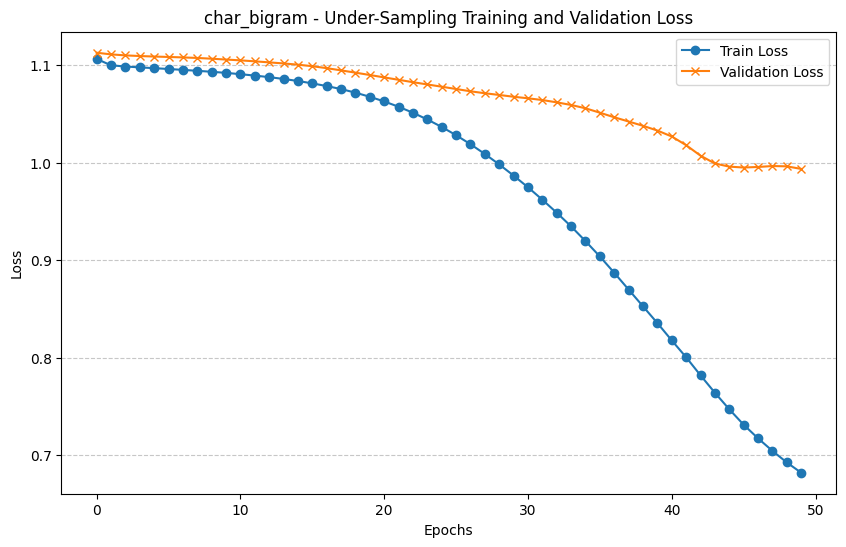


SMOTE:
Epoch [1/50], Train Loss: 1.0907, Train Accuracy: 0.4709, Validation Loss: 1.3204, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.1817, Train Accuracy: 0.2697, Validation Loss: 1.1394, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.1291, Train Accuracy: 0.3161, Validation Loss: 1.1886, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 1.1626, Train Accuracy: 0.2938, Validation Loss: 1.1213, Validation Accuracy: 0.2401
Epoch [5/50], Train Loss: 1.1161, Train Accuracy: 0.4501, Validation Loss: 1.4317, Validation Accuracy: 0.0137
Epoch [6/50], Train Loss: 1.2036, Train Accuracy: 0.1254, Validation Loss: 1.0866, Validation Accuracy: 0.5819
Epoch [7/50], Train Loss: 1.1106, Train Accuracy: 0.4401, Validation Loss: 1.0871, Validation Accuracy: 0.2900
Epoch [8/50], Train Loss: 1.0816, Train Accuracy: 0.4522, Validation Loss: 1.1989, Validation Accuracy: 0.0328
Epoch [9/50], Train Loss: 1.1142, Train Accuracy: 0.3999, Validation Loss: 1.1722, Validation Accuracy: 

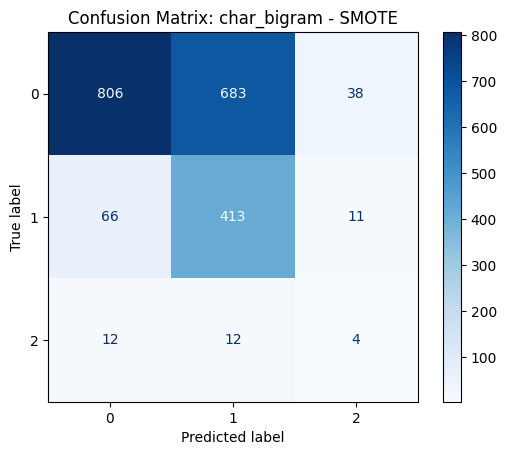

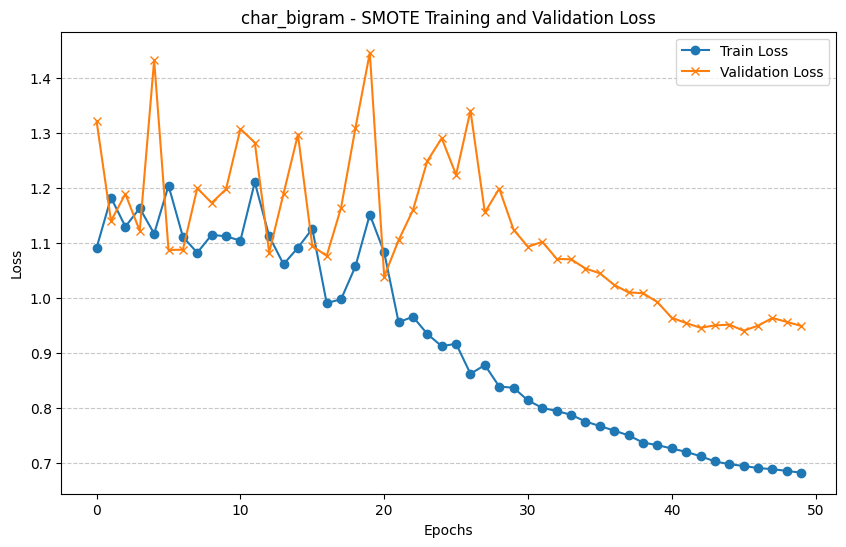

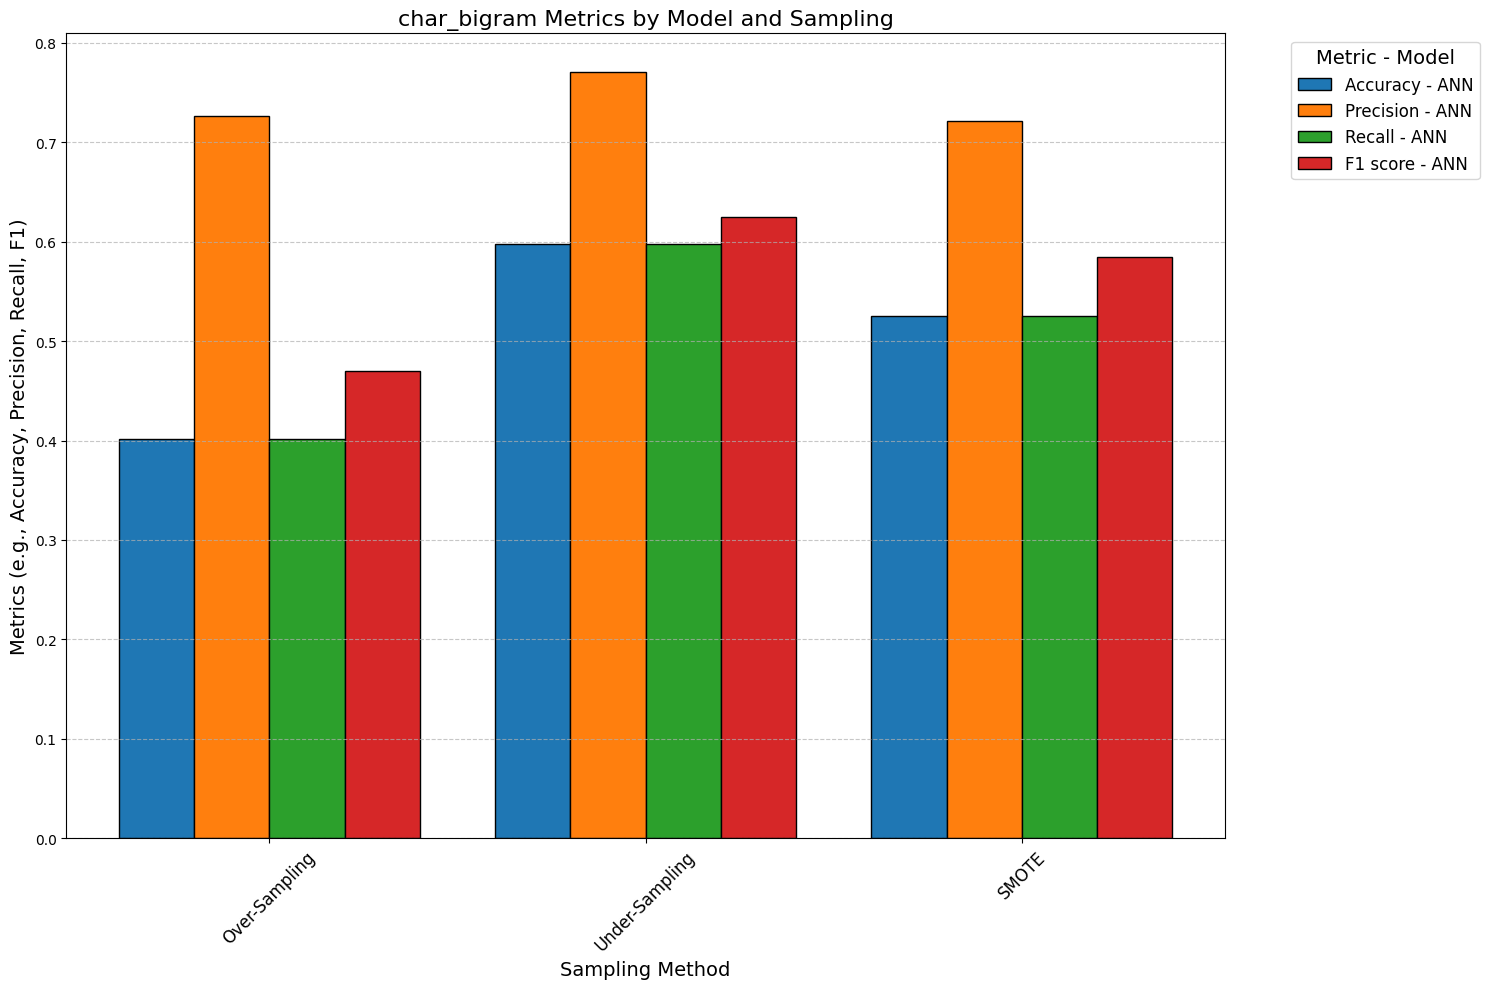

Results saved to models/char_bigram_results.csv


In [17]:
# char bigram-------------------------------------------
feature_union = FeatureUnion([
    ("char_bigram_count", char_bigram_count),
    ("char_bigram_tfidf", char_bigram_tfidf)
])

samplings,X_train_features,X_test_features,y_train_s=make_sampling(feature_union,X_train,X_test,y_train)


results_df = model_training(
                            "char_bigram",
                              X_train, X_test,
                              y_train_s, y_test,
                              samplings,
                              X_train_features,X_test_features,
                              len_labels
                              )
result_dic["char_bigram"] = results_df
del samplings, X_train_features, X_test_features, y_train_s

In [18]:
clear_memory()

Cleared memory.
now memory used: 626.65 MB


Initial X_train shape: (8179, 30438)
Final X_train shape after applying thresholds: (7361, 30438)

Over-Sampling:
Epoch [1/50], Train Loss: 1.1848, Train Accuracy: 0.3532, Validation Loss: 1.2769, Validation Accuracy: 0.2396
Epoch [2/50], Train Loss: 1.1412, Train Accuracy: 0.4107, Validation Loss: 1.4389, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.1999, Train Accuracy: 0.2928, Validation Loss: 1.4637, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 1.0966, Train Accuracy: 0.4396, Validation Loss: 1.5103, Validation Accuracy: 0.0137
Epoch [5/50], Train Loss: 1.0790, Train Accuracy: 0.4584, Validation Loss: 1.4811, Validation Accuracy: 0.0244
Epoch [6/50], Train Loss: 0.9003, Train Accuracy: 0.6436, Validation Loss: 1.3450, Validation Accuracy: 0.1198
Epoch [7/50], Train Loss: 0.7970, Train Accuracy: 0.7457, Validation Loss: 1.2605, Validation Accuracy: 0.2259
Epoch [8/50], Train Loss: 0.7254, Train Accuracy: 0.8203, Validation Loss: 1.2018, Validation Accuracy: 0.314

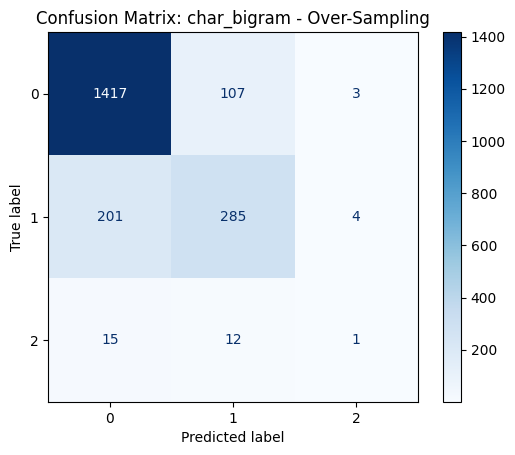

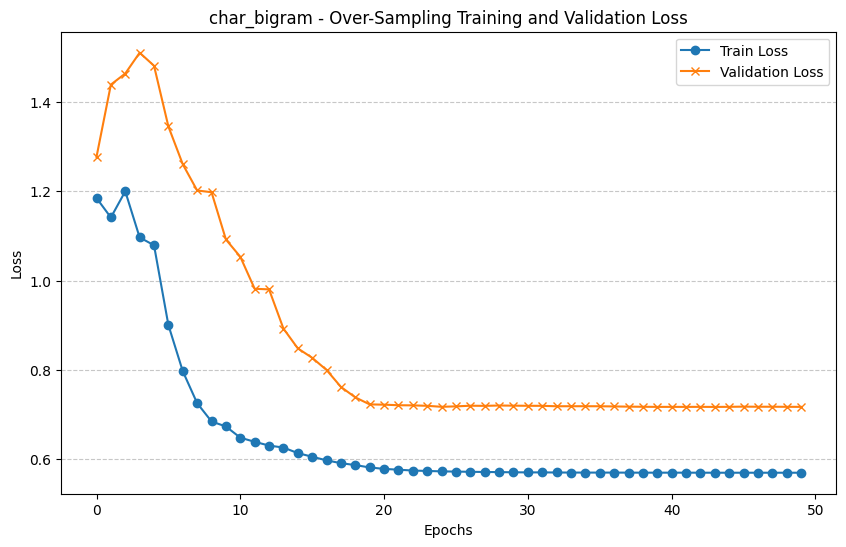


Under-Sampling:
Epoch [1/50], Train Loss: 1.1046, Train Accuracy: 0.3333, Validation Loss: 1.0556, Validation Accuracy: 0.7467
Epoch [2/50], Train Loss: 1.0993, Train Accuracy: 0.3333, Validation Loss: 1.0556, Validation Accuracy: 0.7467
Epoch [3/50], Train Loss: 1.0980, Train Accuracy: 0.3333, Validation Loss: 1.0548, Validation Accuracy: 0.7467
Epoch [4/50], Train Loss: 1.0964, Train Accuracy: 0.3333, Validation Loss: 1.0530, Validation Accuracy: 0.7467
Epoch [5/50], Train Loss: 1.0945, Train Accuracy: 0.3333, Validation Loss: 1.0502, Validation Accuracy: 0.7467
Epoch [6/50], Train Loss: 1.0921, Train Accuracy: 0.3333, Validation Loss: 1.0466, Validation Accuracy: 0.7467
Epoch [7/50], Train Loss: 1.0892, Train Accuracy: 0.3333, Validation Loss: 1.0426, Validation Accuracy: 0.7467
Epoch [8/50], Train Loss: 1.0854, Train Accuracy: 0.3333, Validation Loss: 1.0384, Validation Accuracy: 0.7467
Epoch [9/50], Train Loss: 1.0810, Train Accuracy: 0.3333, Validation Loss: 1.0329, Validation A

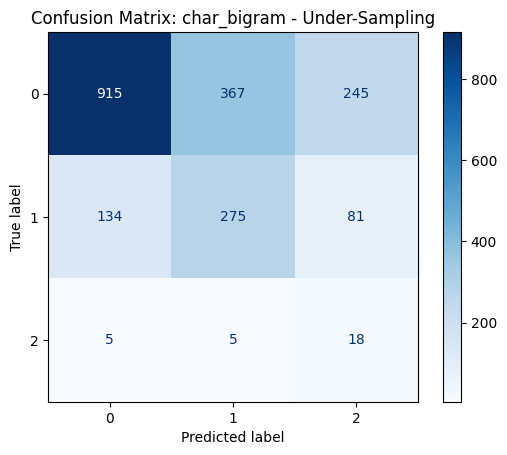

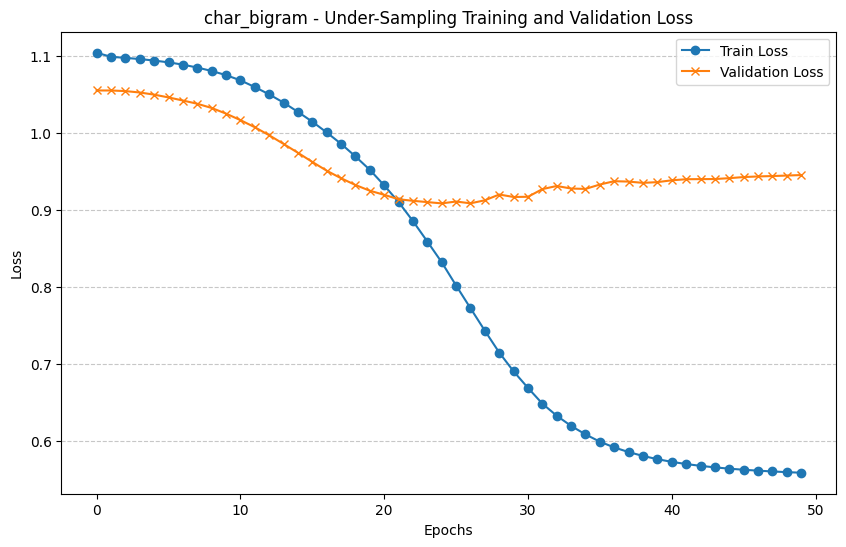


SMOTE:
Epoch [1/50], Train Loss: 0.9978, Train Accuracy: 0.5529, Validation Loss: 1.5166, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.2596, Train Accuracy: 0.2883, Validation Loss: 1.4009, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.0210, Train Accuracy: 0.4670, Validation Loss: 1.5088, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 0.9939, Train Accuracy: 0.5130, Validation Loss: 1.3537, Validation Accuracy: 0.0425
Epoch [5/50], Train Loss: 0.8713, Train Accuracy: 0.6583, Validation Loss: 1.3936, Validation Accuracy: 0.0875
Epoch [6/50], Train Loss: 0.8546, Train Accuracy: 0.6793, Validation Loss: 1.3014, Validation Accuracy: 0.2044
Epoch [7/50], Train Loss: 0.7653, Train Accuracy: 0.7852, Validation Loss: 1.1545, Validation Accuracy: 0.3521
Epoch [8/50], Train Loss: 0.6632, Train Accuracy: 0.8895, Validation Loss: 1.1187, Validation Accuracy: 0.4108
Epoch [9/50], Train Loss: 0.6410, Train Accuracy: 0.9108, Validation Loss: 1.0272, Validation Accuracy: 

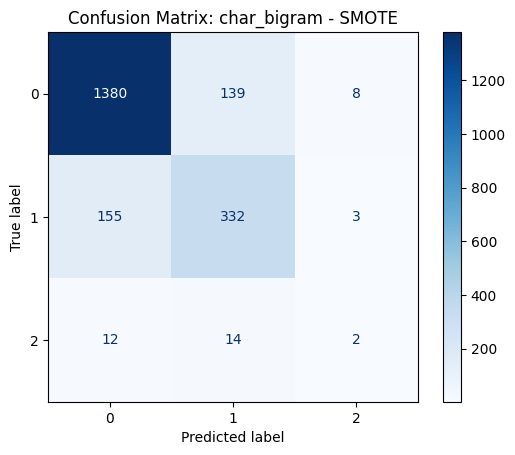

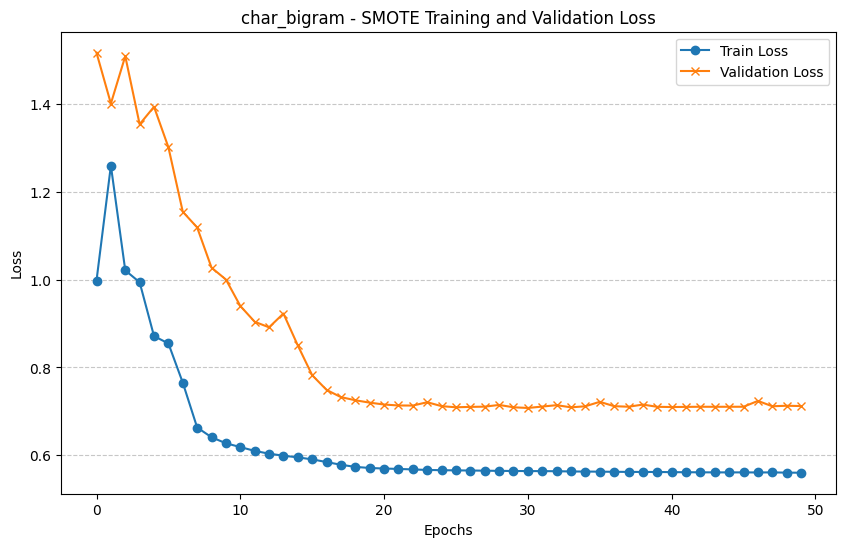

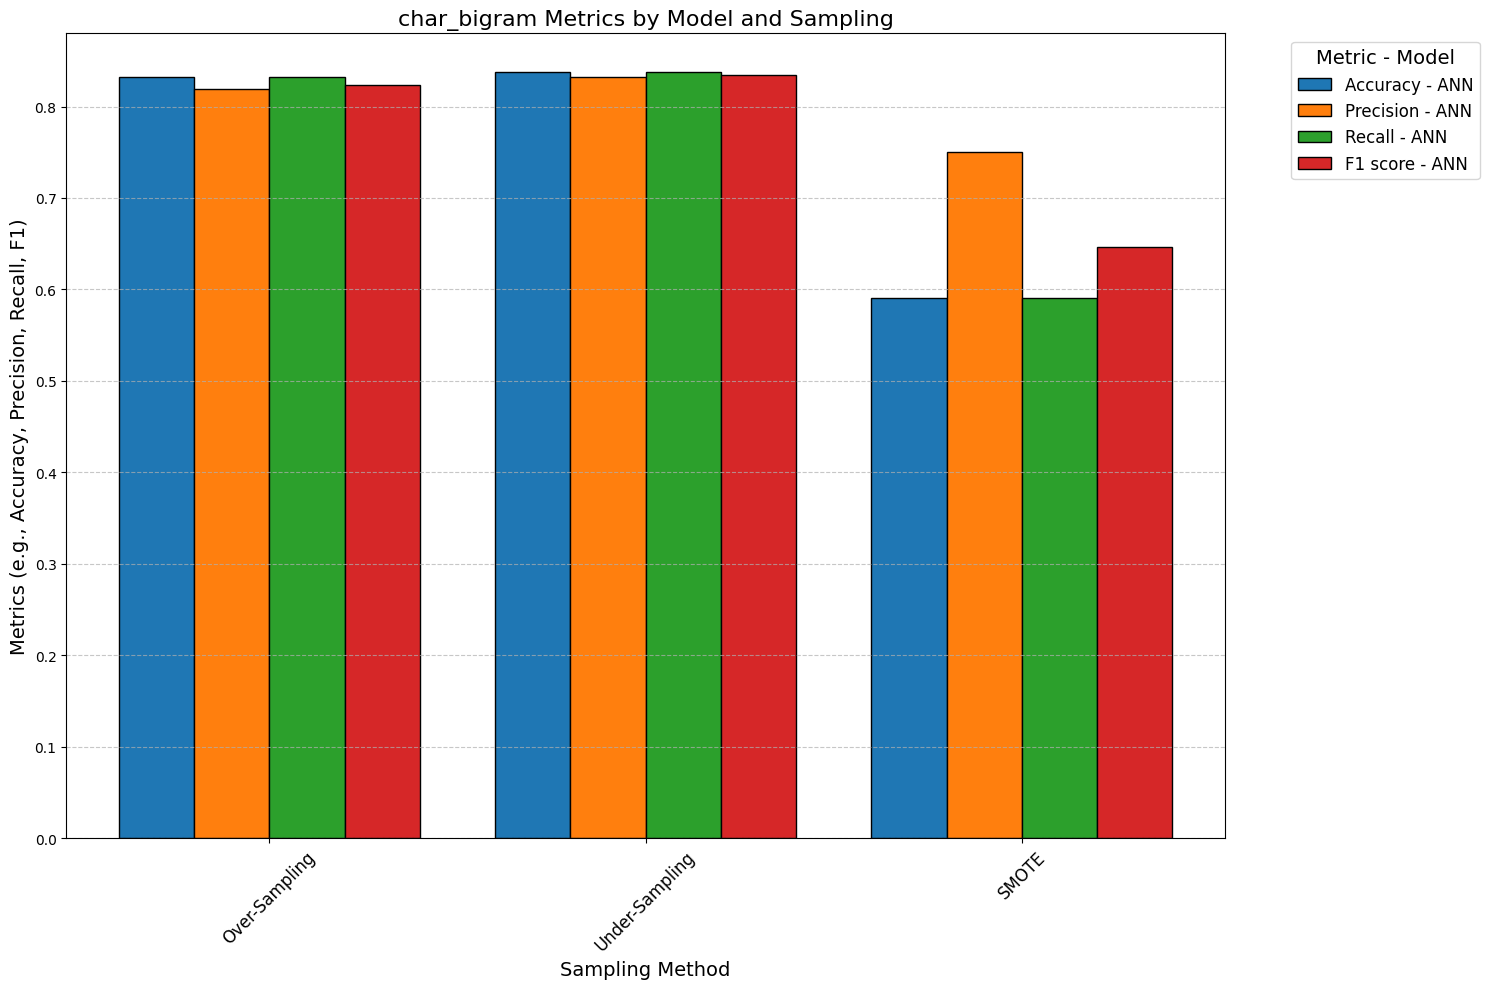

Results saved to models/char_bigram_results.csv


In [19]:
# char trigram-------------------------------------------
feature_union = FeatureUnion([
    ("char_trigram_count", char_trigram_count),
    ("char_trigram_tfidf", char_trigram_tfidf)
])
samplings,X_train_features,X_test_features,y_train_s=make_sampling(feature_union,X_train,X_test,y_train)


results_df = model_training(
                            "char_bigram",
                              X_train, X_test,
                              y_train_s, y_test,
                              samplings,
                              X_train_features,X_test_features,
                              len_labels
                              )
result_dic["char_trigram"] = results_df
del samplings, X_train_features, X_test_features, y_train_s

In [20]:
clear_memory()

Cleared memory.
now memory used: 626.67 MB


Initial X_train shape: (8179, 294540)
Final X_train shape after applying thresholds: (7361, 294540)

Over-Sampling:
Epoch [1/50], Train Loss: 1.0286, Train Accuracy: 0.5494, Validation Loss: 1.5116, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.3172, Train Accuracy: 0.2450, Validation Loss: 1.2245, Validation Accuracy: 0.2396
Epoch [3/50], Train Loss: 1.1317, Train Accuracy: 0.3614, Validation Loss: 1.1564, Validation Accuracy: 0.1780
Epoch [4/50], Train Loss: 1.0456, Train Accuracy: 0.5099, Validation Loss: 1.5317, Validation Accuracy: 0.0137
Epoch [5/50], Train Loss: 1.2041, Train Accuracy: 0.3399, Validation Loss: 1.4874, Validation Accuracy: 0.0401
Epoch [6/50], Train Loss: 0.8730, Train Accuracy: 0.6545, Validation Loss: 1.2057, Validation Accuracy: 0.2264
Epoch [7/50], Train Loss: 0.6972, Train Accuracy: 0.8566, Validation Loss: 1.1799, Validation Accuracy: 0.3345
Epoch [8/50], Train Loss: 0.5998, Train Accuracy: 0.9533, Validation Loss: 0.9081, Validation Accuracy: 0.6

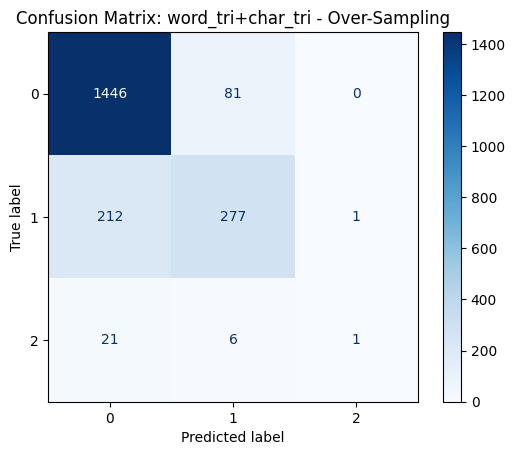

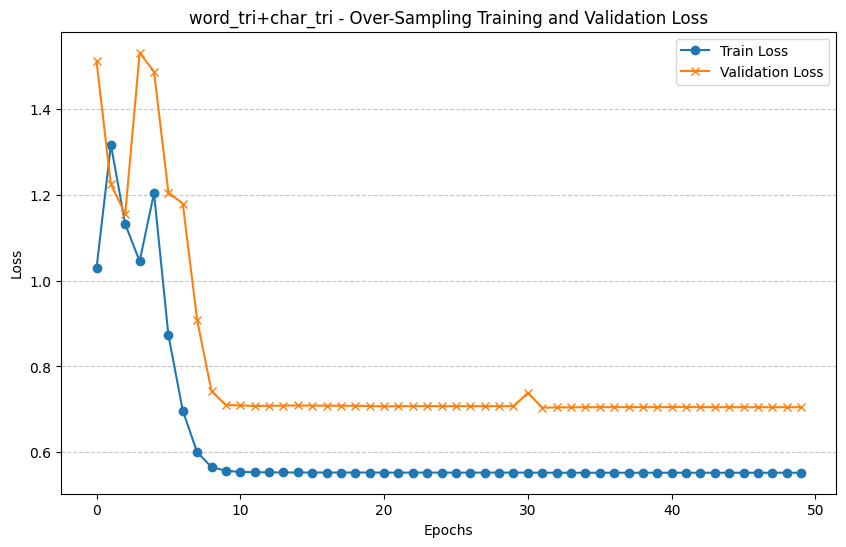


Under-Sampling:
Epoch [1/50], Train Loss: 1.1037, Train Accuracy: 0.3333, Validation Loss: 1.1102, Validation Accuracy: 0.2396
Epoch [2/50], Train Loss: 1.0991, Train Accuracy: 0.3333, Validation Loss: 1.1098, Validation Accuracy: 0.2396
Epoch [3/50], Train Loss: 1.0967, Train Accuracy: 0.3333, Validation Loss: 1.1099, Validation Accuracy: 0.2396
Epoch [4/50], Train Loss: 1.0939, Train Accuracy: 0.3333, Validation Loss: 1.1103, Validation Accuracy: 0.2396
Epoch [5/50], Train Loss: 1.0904, Train Accuracy: 0.3333, Validation Loss: 1.1106, Validation Accuracy: 0.2396
Epoch [6/50], Train Loss: 1.0860, Train Accuracy: 0.3333, Validation Loss: 1.1106, Validation Accuracy: 0.2396
Epoch [7/50], Train Loss: 1.0803, Train Accuracy: 0.3932, Validation Loss: 1.1108, Validation Accuracy: 0.2396
Epoch [8/50], Train Loss: 1.0735, Train Accuracy: 0.4688, Validation Loss: 1.1111, Validation Accuracy: 0.2377
Epoch [9/50], Train Loss: 1.0649, Train Accuracy: 0.5469, Validation Loss: 1.1113, Validation A

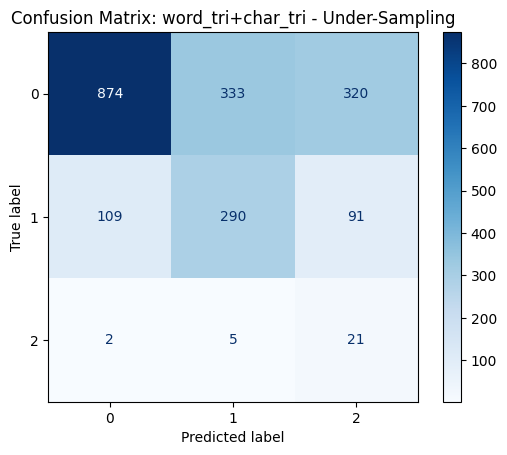

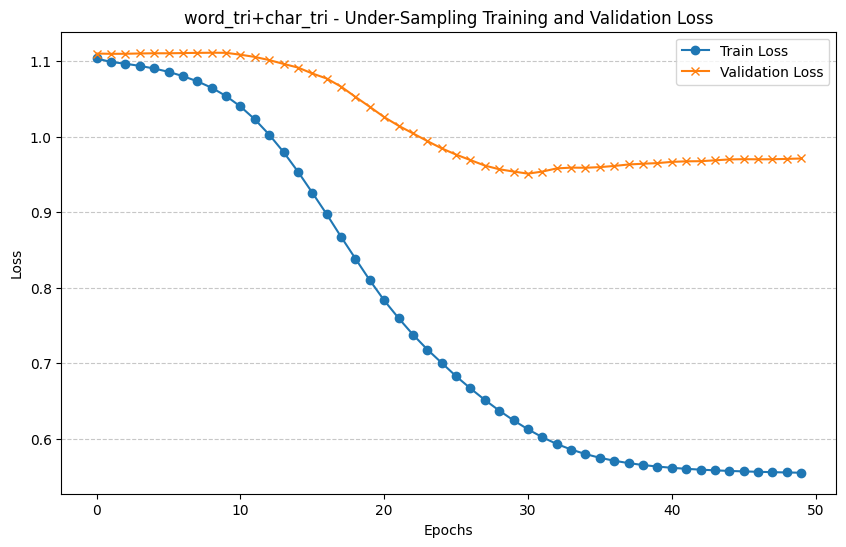


SMOTE:
Epoch [1/50], Train Loss: 1.0409, Train Accuracy: 0.5301, Validation Loss: 1.4448, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.0775, Train Accuracy: 0.4358, Validation Loss: 1.3442, Validation Accuracy: 0.0166
Epoch [3/50], Train Loss: 0.8596, Train Accuracy: 0.6680, Validation Loss: 1.2974, Validation Accuracy: 0.1296
Epoch [4/50], Train Loss: 0.7628, Train Accuracy: 0.7748, Validation Loss: 1.2928, Validation Accuracy: 0.2396
Epoch [5/50], Train Loss: 0.7909, Train Accuracy: 0.7611, Validation Loss: 1.1613, Validation Accuracy: 0.3457
Epoch [6/50], Train Loss: 0.6148, Train Accuracy: 0.9395, Validation Loss: 0.8939, Validation Accuracy: 0.6377
Epoch [7/50], Train Loss: 0.5700, Train Accuracy: 0.9831, Validation Loss: 0.7194, Validation Accuracy: 0.8303
Epoch [8/50], Train Loss: 0.5573, Train Accuracy: 0.9955, Validation Loss: 0.7050, Validation Accuracy: 0.8396
Epoch [9/50], Train Loss: 0.5540, Train Accuracy: 0.9981, Validation Loss: 0.7036, Validation Accuracy: 

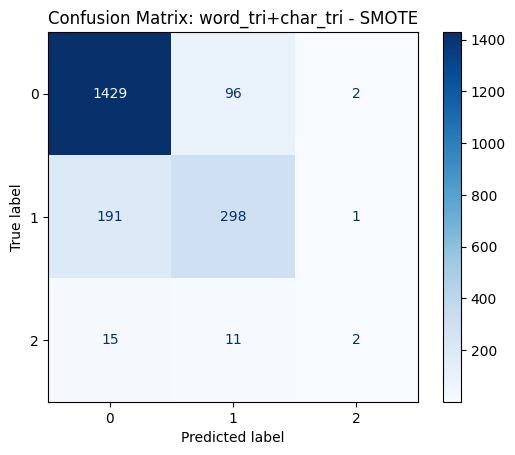

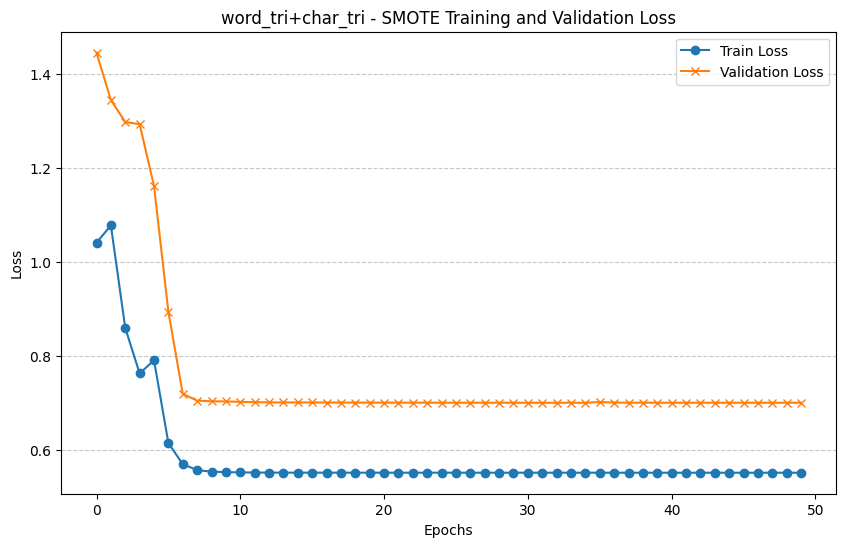

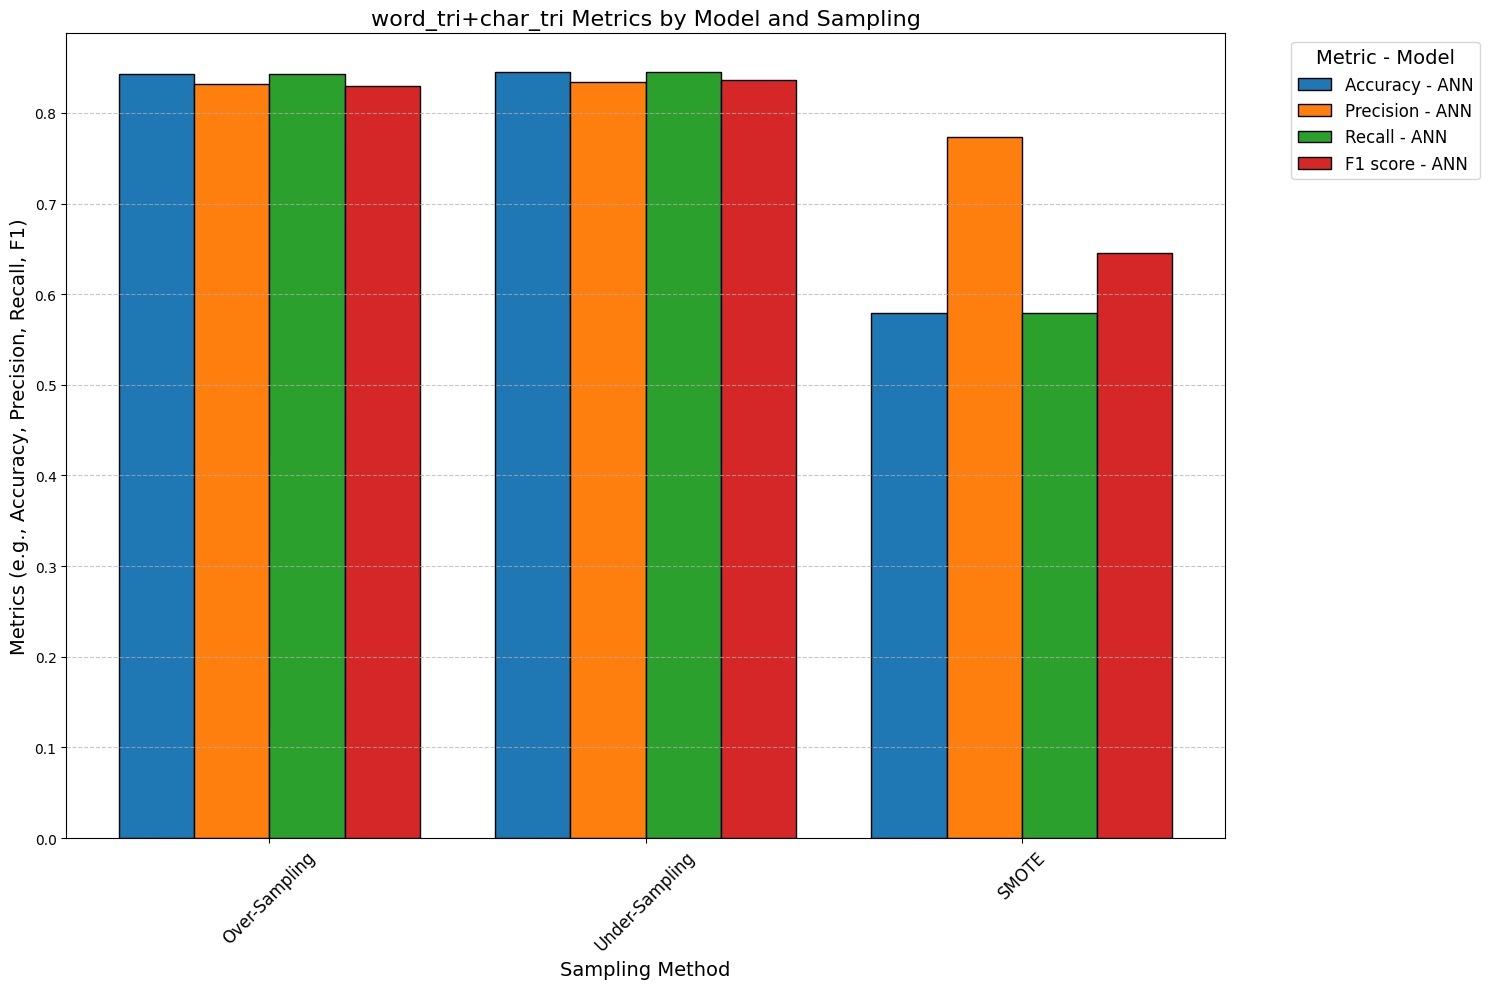

Results saved to models/word_tri+char_tri_results.csv


In [21]:
# char bigram + char trigram-------------------------------------------
feature_union = FeatureUnion([
    ("word_bigram_count", word_bigram_count),
    ("word_bigram_tfidf", word_bigram_tfidf),

    ("char_trigram_count", char_trigram_count),
    ("char_trigram_tfidf", char_trigram_tfidf)

])
samplings,X_train_features,X_test_features,y_train_s=make_sampling(feature_union,X_train,X_test,y_train)


results_df = model_training(
                            "word_tri+char_tri",
                              X_train, X_test,
                              y_train_s, y_test,
                              samplings,
                              X_train_features,X_test_features,
                              len_labels
                              )
result_dic["word_tri+char_tri"] = results_df
del samplings, X_train_features, X_test_features, y_train_s

In [22]:
clear_memory()

Cleared memory.
now memory used: 662.59 MB


Initial X_train shape: (8179, 129150)
Final X_train shape after applying thresholds: (7361, 129150)

Over-Sampling:
Epoch [1/50], Train Loss: 1.0224, Train Accuracy: 0.6075, Validation Loss: 1.5212, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.2015, Train Accuracy: 0.3007, Validation Loss: 1.5108, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.1033, Train Accuracy: 0.4128, Validation Loss: 1.4945, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 0.9553, Train Accuracy: 0.5803, Validation Loss: 1.4486, Validation Accuracy: 0.0328
Epoch [5/50], Train Loss: 0.9151, Train Accuracy: 0.6368, Validation Loss: 1.2811, Validation Accuracy: 0.2147
Epoch [6/50], Train Loss: 0.7868, Train Accuracy: 0.7740, Validation Loss: 1.2625, Validation Accuracy: 0.2445
Epoch [7/50], Train Loss: 0.6945, Train Accuracy: 0.8595, Validation Loss: 1.1903, Validation Accuracy: 0.3301
Epoch [8/50], Train Loss: 0.6378, Train Accuracy: 0.9155, Validation Loss: 1.0961, Validation Accuracy: 0.4

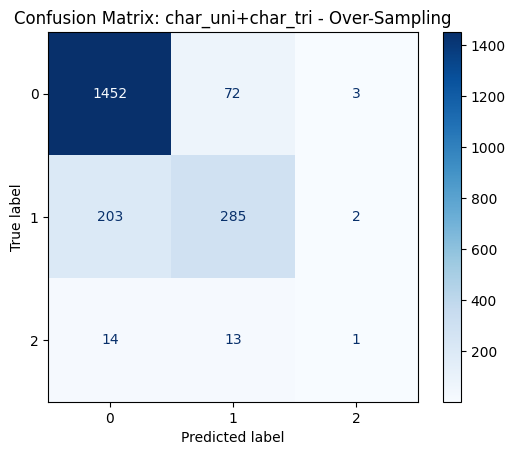

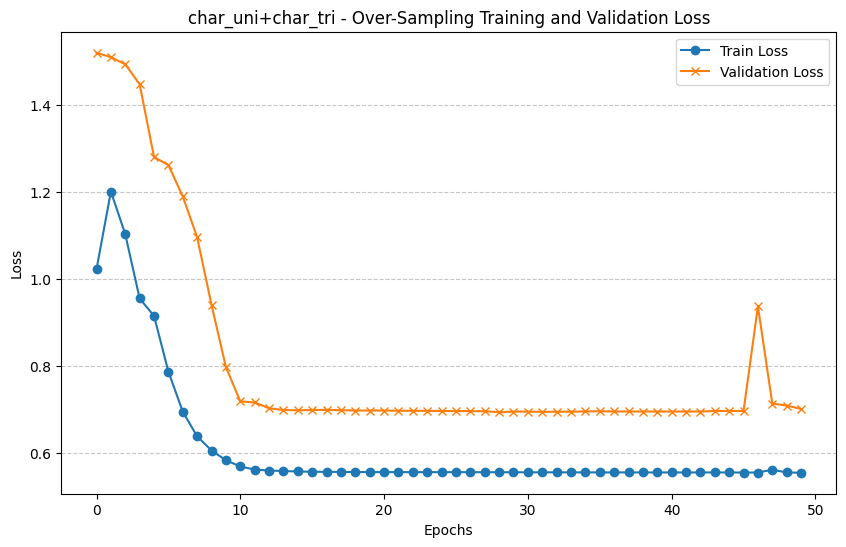


Under-Sampling:
Epoch [1/50], Train Loss: 1.1027, Train Accuracy: 0.2031, Validation Loss: 1.0715, Validation Accuracy: 0.2396
Epoch [2/50], Train Loss: 1.0990, Train Accuracy: 0.3333, Validation Loss: 1.0705, Validation Accuracy: 0.3164
Epoch [3/50], Train Loss: 1.0968, Train Accuracy: 0.5104, Validation Loss: 1.0692, Validation Accuracy: 0.5697
Epoch [4/50], Train Loss: 1.0942, Train Accuracy: 0.6120, Validation Loss: 1.0671, Validation Accuracy: 0.6636
Epoch [5/50], Train Loss: 1.0903, Train Accuracy: 0.6458, Validation Loss: 1.0635, Validation Accuracy: 0.7022
Epoch [6/50], Train Loss: 1.0853, Train Accuracy: 0.6641, Validation Loss: 1.0581, Validation Accuracy: 0.7320
Epoch [7/50], Train Loss: 1.0793, Train Accuracy: 0.6641, Validation Loss: 1.0519, Validation Accuracy: 0.7467
Epoch [8/50], Train Loss: 1.0720, Train Accuracy: 0.6641, Validation Loss: 1.0455, Validation Accuracy: 0.7516
Epoch [9/50], Train Loss: 1.0636, Train Accuracy: 0.6641, Validation Loss: 1.0380, Validation A

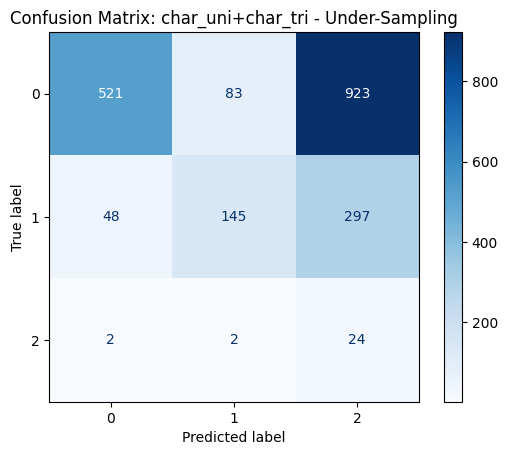

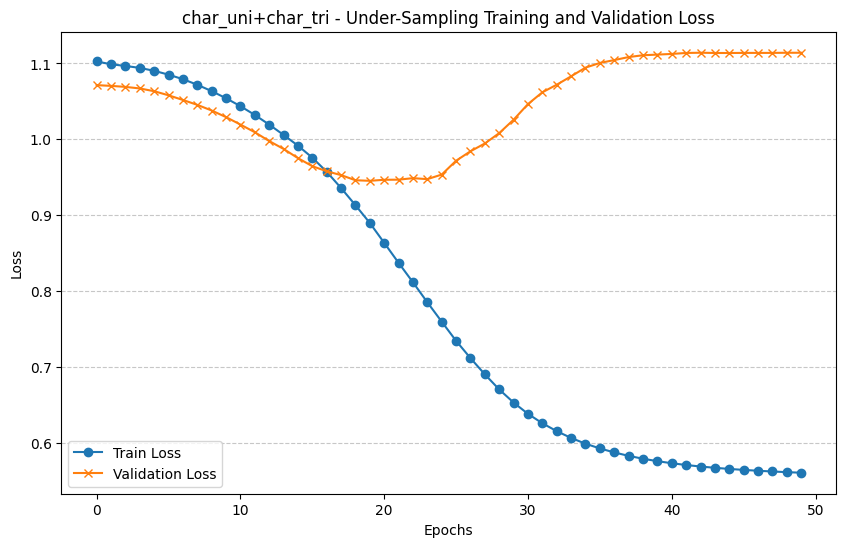


SMOTE:
Epoch [1/50], Train Loss: 1.0239, Train Accuracy: 0.5693, Validation Loss: 1.5120, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.1880, Train Accuracy: 0.3108, Validation Loss: 1.4898, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.0257, Train Accuracy: 0.4687, Validation Loss: 1.3969, Validation Accuracy: 0.0156
Epoch [4/50], Train Loss: 0.8570, Train Accuracy: 0.6831, Validation Loss: 1.3313, Validation Accuracy: 0.1565
Epoch [5/50], Train Loss: 0.7117, Train Accuracy: 0.8379, Validation Loss: 1.2386, Validation Accuracy: 0.2660
Epoch [6/50], Train Loss: 0.6355, Train Accuracy: 0.9164, Validation Loss: 1.1121, Validation Accuracy: 0.4244
Epoch [7/50], Train Loss: 0.6045, Train Accuracy: 0.9466, Validation Loss: 0.9254, Validation Accuracy: 0.6142
Epoch [8/50], Train Loss: 0.5840, Train Accuracy: 0.9681, Validation Loss: 0.8154, Validation Accuracy: 0.7267
Epoch [9/50], Train Loss: 0.5726, Train Accuracy: 0.9789, Validation Loss: 0.7965, Validation Accuracy: 

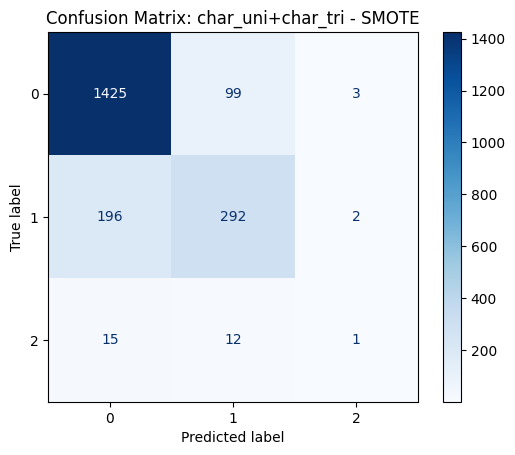

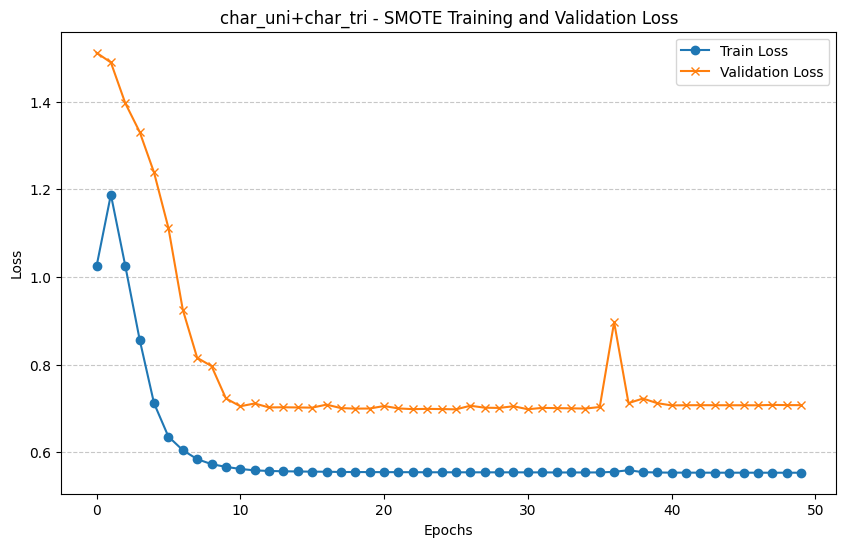

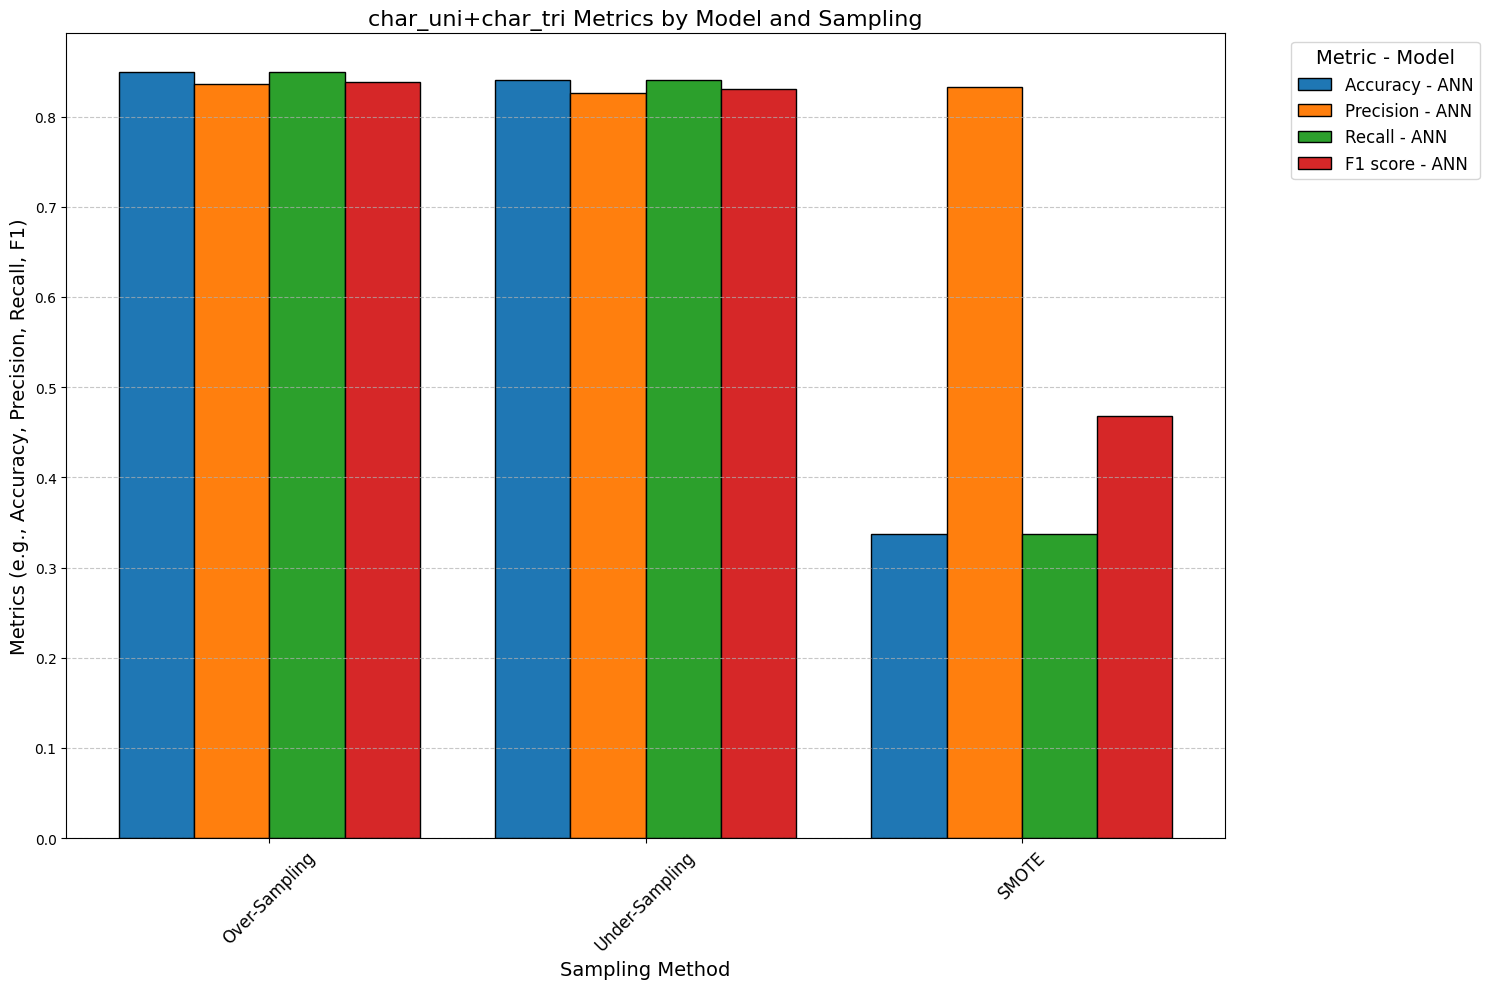

Results saved to models/char_uni+char_tri_results.csv


In [23]:
# char unigram + char trigram-------------------------------------------
feature_union = FeatureUnion([
    ("word_unigram_count", word_unigram_count),
    ("word_unigram_tfidf", word_unigram_tfidf),

    ("char_trigram_count", char_trigram_count),
    ("char_trigram_tfidf", char_trigram_tfidf)

])

samplings,X_train_features,X_test_features,y_train_s=make_sampling(feature_union,X_train,X_test,y_train)


results_df = model_training(
                            "char_uni+char_tri",
                              X_train, X_test,
                              y_train_s, y_test,
                              samplings,
                              X_train_features,X_test_features,
                              len_labels
                              )
result_dic["char_uni+char_tri"] = results_df


In [24]:
clear_memory()

Cleared memory.
now memory used: 41923.72 MB


Initial X_train shape: (8179, 132814)
Final X_train shape after applying thresholds: (7361, 132814)

Over-Sampling:
Epoch [1/50], Train Loss: 1.1727, Train Accuracy: 0.4008, Validation Loss: 1.1418, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.1192, Train Accuracy: 0.4252, Validation Loss: 1.4605, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.1273, Train Accuracy: 0.3600, Validation Loss: 1.5135, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 1.3303, Train Accuracy: 0.2047, Validation Loss: 1.1329, Validation Accuracy: 0.0156
Epoch [5/50], Train Loss: 0.9926, Train Accuracy: 0.5183, Validation Loss: 1.4820, Validation Accuracy: 0.0191
Epoch [6/50], Train Loss: 1.0214, Train Accuracy: 0.5128, Validation Loss: 1.1919, Validation Accuracy: 0.3364
Epoch [7/50], Train Loss: 0.8871, Train Accuracy: 0.6360, Validation Loss: 1.2869, Validation Accuracy: 0.0655
Epoch [8/50], Train Loss: 0.9366, Train Accuracy: 0.5661, Validation Loss: 1.3931, Validation Accuracy: 0.0

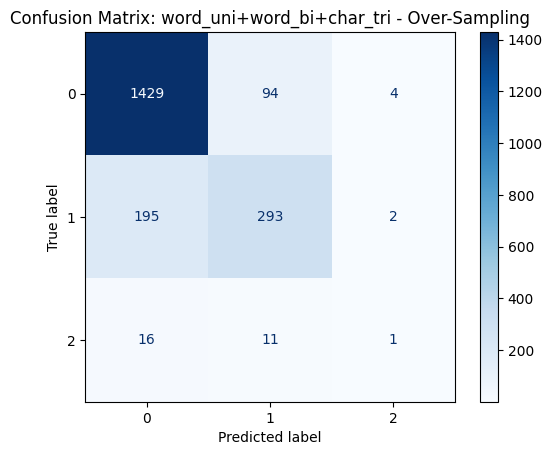

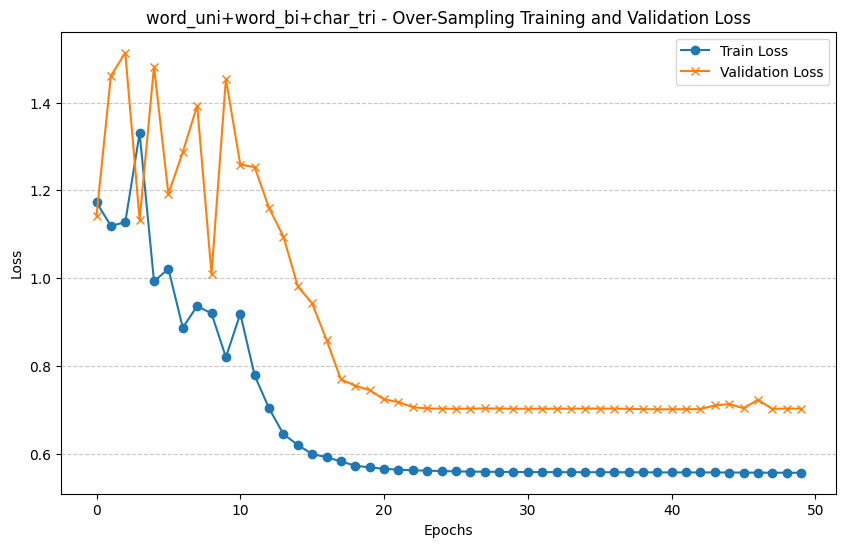


Under-Sampling:
Epoch [1/50], Train Loss: 1.1033, Train Accuracy: 0.3333, Validation Loss: 1.0568, Validation Accuracy: 0.7467
Epoch [2/50], Train Loss: 1.1006, Train Accuracy: 0.3333, Validation Loss: 1.0587, Validation Accuracy: 0.7467
Epoch [3/50], Train Loss: 1.0968, Train Accuracy: 0.3333, Validation Loss: 1.0610, Validation Accuracy: 0.7472
Epoch [4/50], Train Loss: 1.0931, Train Accuracy: 0.3858, Validation Loss: 1.0625, Validation Accuracy: 0.7447
Epoch [5/50], Train Loss: 1.0887, Train Accuracy: 0.4357, Validation Loss: 1.0634, Validation Accuracy: 0.6998
Epoch [6/50], Train Loss: 1.0837, Train Accuracy: 0.4593, Validation Loss: 1.0641, Validation Accuracy: 0.6729
Epoch [7/50], Train Loss: 1.0782, Train Accuracy: 0.4882, Validation Loss: 1.0650, Validation Accuracy: 0.6298
Epoch [8/50], Train Loss: 1.0716, Train Accuracy: 0.5223, Validation Loss: 1.0662, Validation Accuracy: 0.5756
Epoch [9/50], Train Loss: 1.0638, Train Accuracy: 0.5774, Validation Loss: 1.0674, Validation A

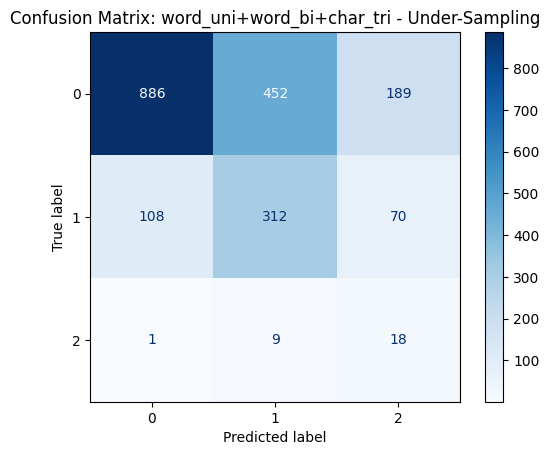

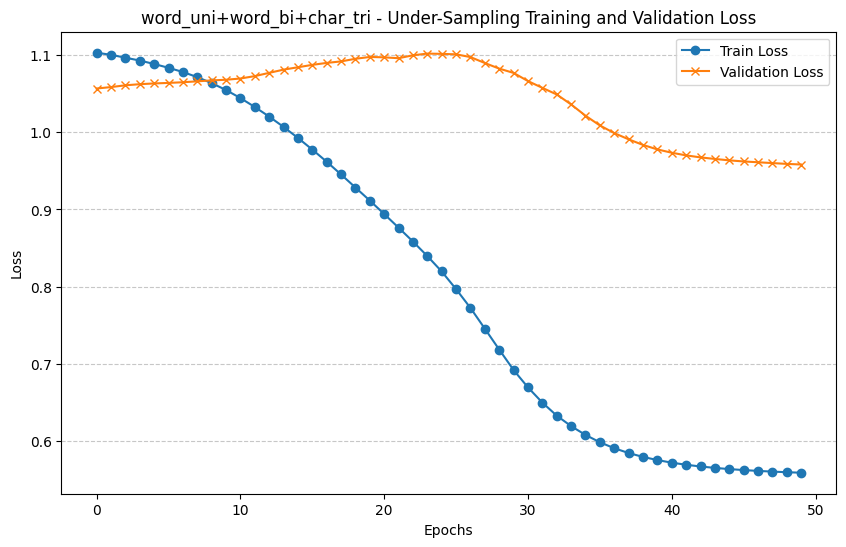


SMOTE:
Epoch [1/50], Train Loss: 0.9903, Train Accuracy: 0.5868, Validation Loss: 1.5155, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.2261, Train Accuracy: 0.3333, Validation Loss: 1.5163, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.1743, Train Accuracy: 0.3427, Validation Loss: 1.4949, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 1.0737, Train Accuracy: 0.4641, Validation Loss: 1.4650, Validation Accuracy: 0.0181
Epoch [5/50], Train Loss: 0.9353, Train Accuracy: 0.5875, Validation Loss: 1.3636, Validation Accuracy: 0.0773
Epoch [6/50], Train Loss: 0.8399, Train Accuracy: 0.6925, Validation Loss: 1.3125, Validation Accuracy: 0.1521
Epoch [7/50], Train Loss: 0.7227, Train Accuracy: 0.8271, Validation Loss: 1.2301, Validation Accuracy: 0.2592
Epoch [8/50], Train Loss: 0.6838, Train Accuracy: 0.8710, Validation Loss: 1.0818, Validation Accuracy: 0.4377
Epoch [9/50], Train Loss: 0.6204, Train Accuracy: 0.9331, Validation Loss: 1.1276, Validation Accuracy: 

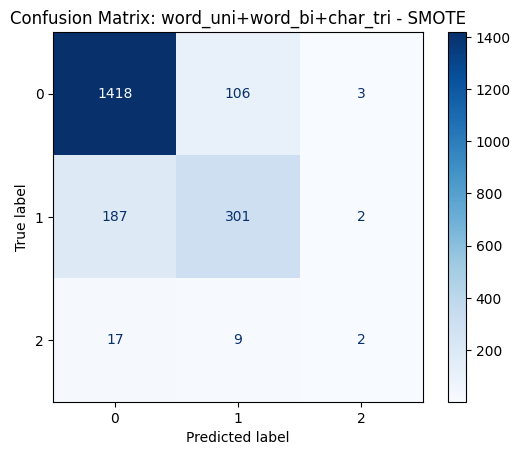

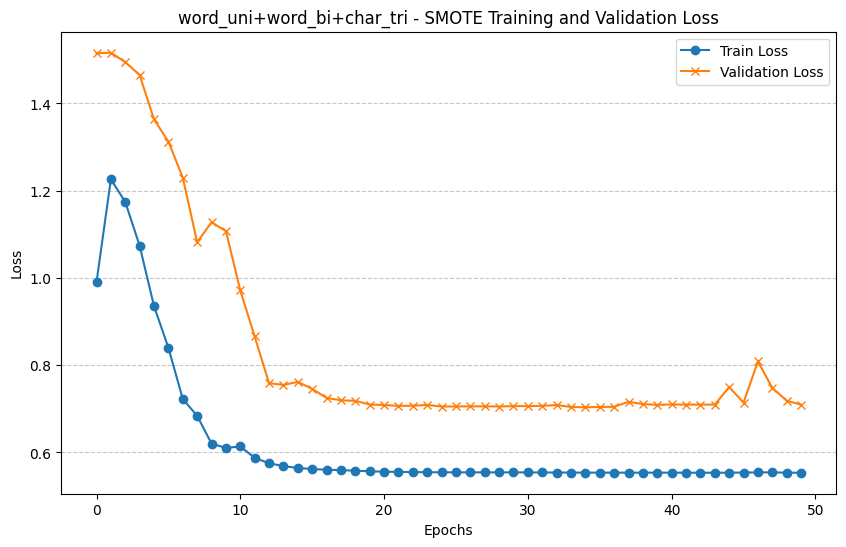

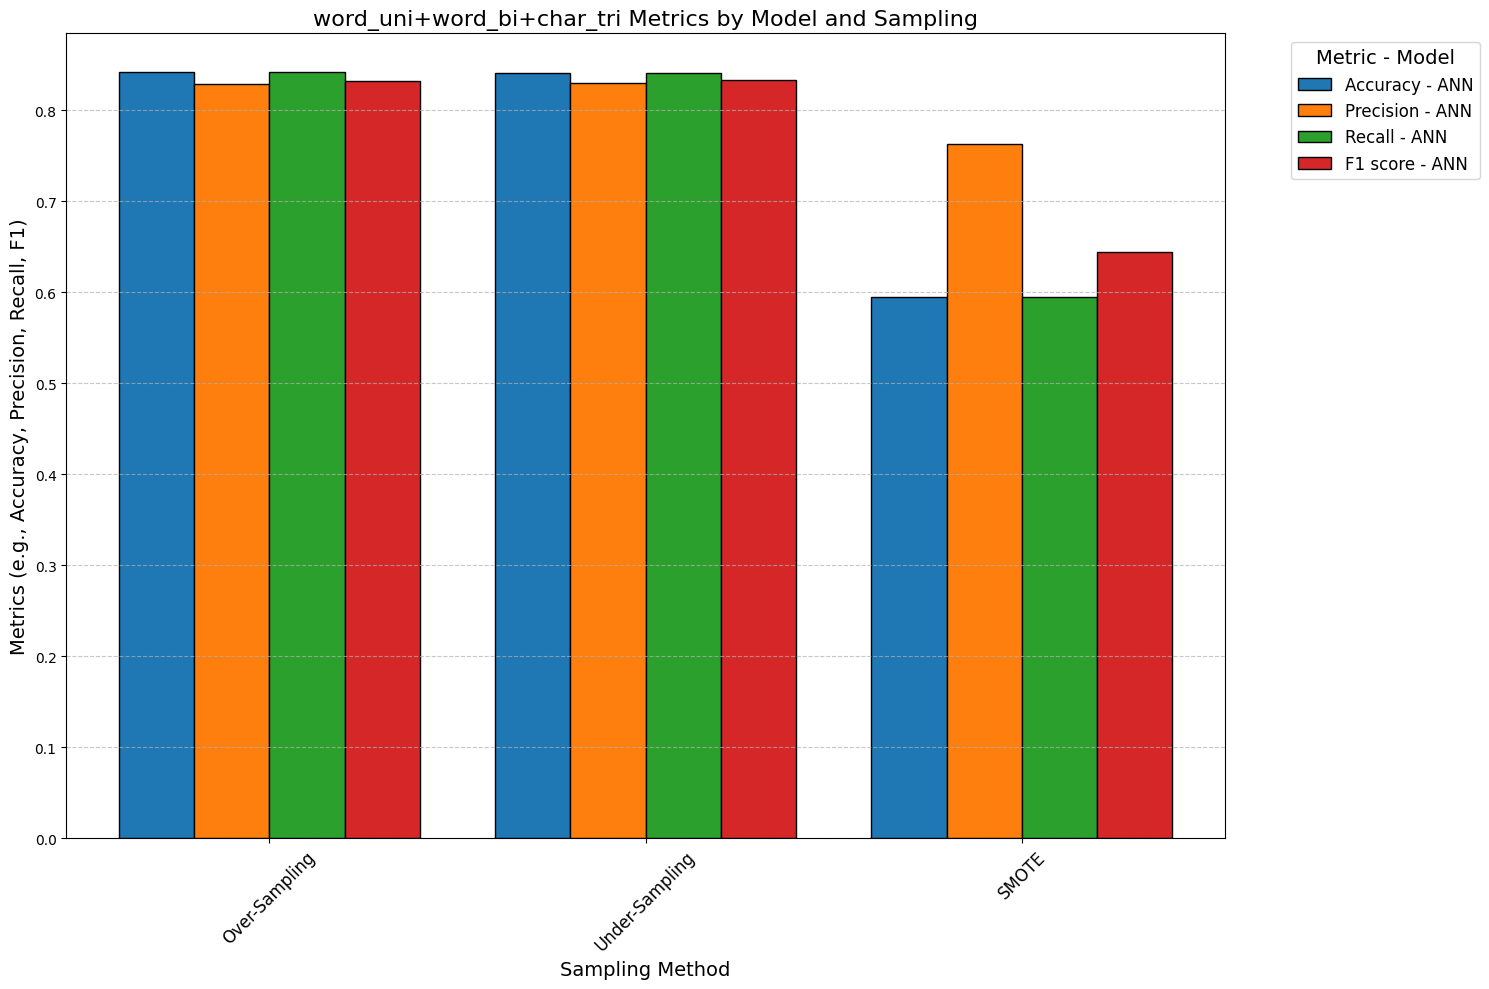

Results saved to models/word_uni+word_bi+char_tri_results.csv


In [25]:
# word unigram + word bigram + char trigram -------------------------------------------
feature_union = FeatureUnion([
    ("word_unigram_count", word_unigram_count),
    ("word_unigram_tfidf", word_unigram_tfidf),

    ("char_bigram_count", char_bigram_count),
    ("char_bigram_tfidf", char_bigram_tfidf),

    ("char_trigram_count", char_trigram_count),
    ("char_trigram_tfidf", char_trigram_tfidf)

])
samplings,X_train_features,X_test_features,y_train_s=make_sampling(feature_union,X_train,X_test,y_train)


results_df = model_training(
                            "word_uni+word_bi+char_tri",
                              X_train, X_test,
                              y_train_s, y_test,
                              samplings,
                              X_train_features,X_test_features,
                              len_labels
                              )
del samplings, X_train_features, X_test_features, y_train_s
result_dic["word_uni+word_bi+char_tri"] = results_df

In [26]:
clear_memory()

Cleared memory.
now memory used: 720.38 MB


Initial X_train shape: (8179, 396916)
Final X_train shape after applying thresholds: (7361, 396916)

Over-Sampling:
Epoch [1/50], Train Loss: 1.0477, Train Accuracy: 0.4985, Validation Loss: 1.4524, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.2592, Train Accuracy: 0.2498, Validation Loss: 1.2705, Validation Accuracy: 0.2396
Epoch [3/50], Train Loss: 1.1110, Train Accuracy: 0.4518, Validation Loss: 1.1167, Validation Accuracy: 0.2318
Epoch [4/50], Train Loss: 0.9304, Train Accuracy: 0.6252, Validation Loss: 1.4515, Validation Accuracy: 0.0474
Epoch [5/50], Train Loss: 0.9358, Train Accuracy: 0.5964, Validation Loss: 1.4291, Validation Accuracy: 0.0753
Epoch [6/50], Train Loss: 0.8684, Train Accuracy: 0.6648, Validation Loss: 1.2869, Validation Accuracy: 0.2127
Epoch [7/50], Train Loss: 0.7203, Train Accuracy: 0.8376, Validation Loss: 1.0503, Validation Accuracy: 0.4665
Epoch [8/50], Train Loss: 0.5864, Train Accuracy: 0.9748, Validation Loss: 0.7794, Validation Accuracy: 0.7

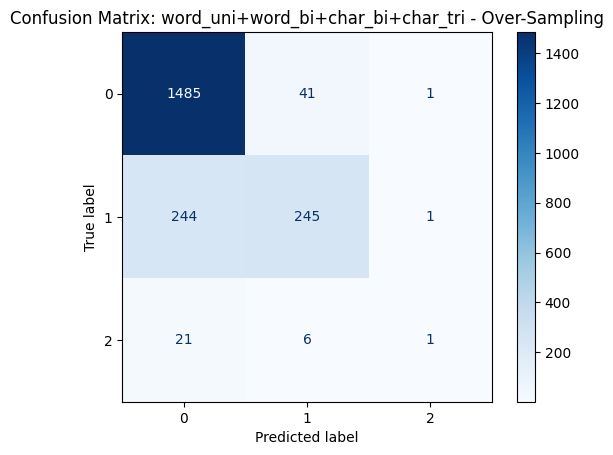

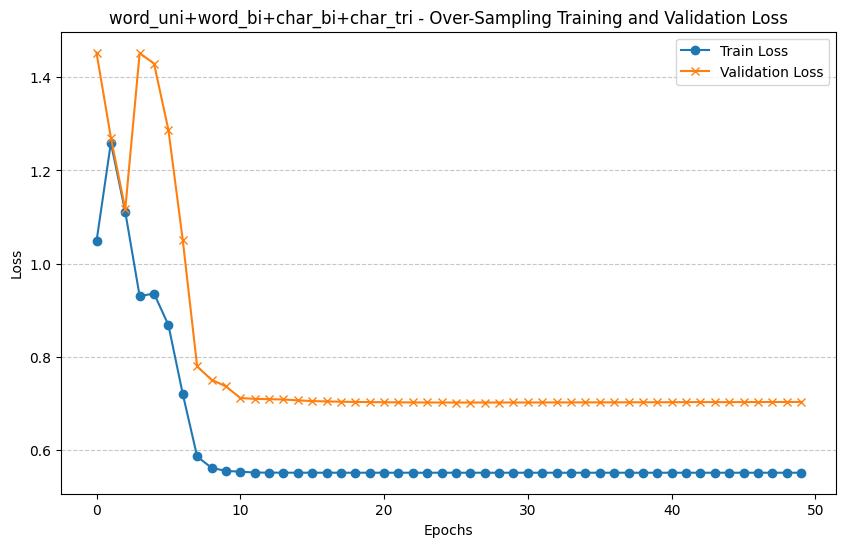


Under-Sampling:
Epoch [1/50], Train Loss: 1.1096, Train Accuracy: 0.3333, Validation Loss: 1.0569, Validation Accuracy: 0.6406
Epoch [2/50], Train Loss: 1.0979, Train Accuracy: 0.4383, Validation Loss: 1.0563, Validation Accuracy: 0.7222
Epoch [3/50], Train Loss: 1.0919, Train Accuracy: 0.5223, Validation Loss: 1.0546, Validation Accuracy: 0.7535
Epoch [4/50], Train Loss: 1.0852, Train Accuracy: 0.5906, Validation Loss: 1.0524, Validation Accuracy: 0.7594
Epoch [5/50], Train Loss: 1.0780, Train Accuracy: 0.6325, Validation Loss: 1.0503, Validation Accuracy: 0.7403
Epoch [6/50], Train Loss: 1.0695, Train Accuracy: 0.6509, Validation Loss: 1.0491, Validation Accuracy: 0.6689
Epoch [7/50], Train Loss: 1.0589, Train Accuracy: 0.6667, Validation Loss: 1.0483, Validation Accuracy: 0.5731
Epoch [8/50], Train Loss: 1.0467, Train Accuracy: 0.6667, Validation Loss: 1.0466, Validation Accuracy: 0.4963
Epoch [9/50], Train Loss: 1.0320, Train Accuracy: 0.6667, Validation Loss: 1.0456, Validation A

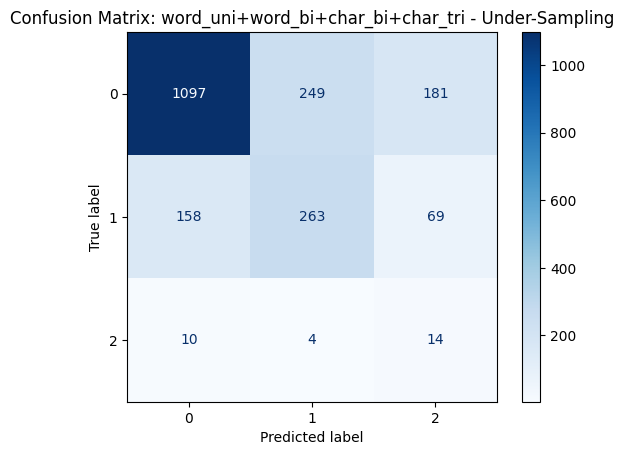

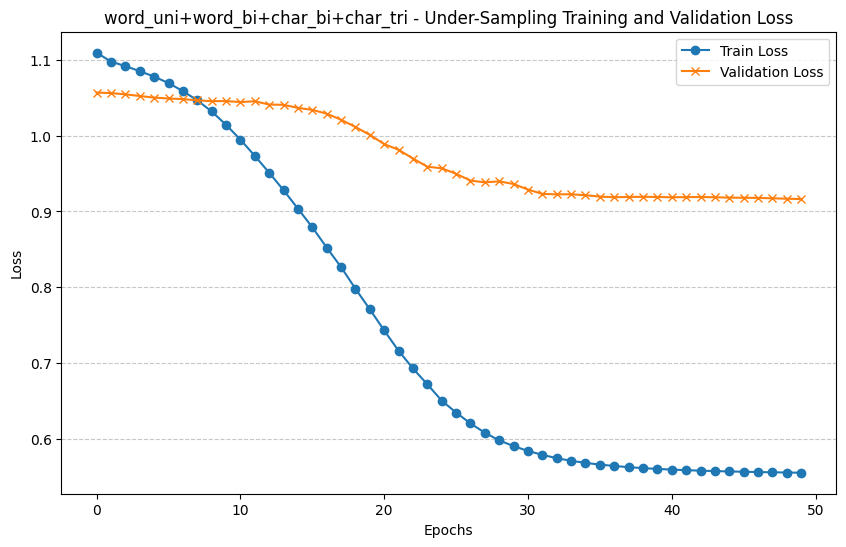


SMOTE:
Epoch [1/50], Train Loss: 0.9746, Train Accuracy: 0.5873, Validation Loss: 1.5295, Validation Accuracy: 0.0137
Epoch [2/50], Train Loss: 1.2705, Train Accuracy: 0.2466, Validation Loss: 1.4630, Validation Accuracy: 0.0137
Epoch [3/50], Train Loss: 1.1198, Train Accuracy: 0.3667, Validation Loss: 1.4851, Validation Accuracy: 0.0137
Epoch [4/50], Train Loss: 1.0052, Train Accuracy: 0.4795, Validation Loss: 1.5262, Validation Accuracy: 0.0137
Epoch [5/50], Train Loss: 0.9278, Train Accuracy: 0.6221, Validation Loss: 1.3062, Validation Accuracy: 0.2068
Epoch [6/50], Train Loss: 0.8624, Train Accuracy: 0.6773, Validation Loss: 1.2897, Validation Accuracy: 0.1956
Epoch [7/50], Train Loss: 0.7223, Train Accuracy: 0.8388, Validation Loss: 1.2455, Validation Accuracy: 0.2592
Epoch [8/50], Train Loss: 0.6296, Train Accuracy: 0.9285, Validation Loss: 0.9244, Validation Accuracy: 0.6215
Epoch [9/50], Train Loss: 0.5757, Train Accuracy: 0.9812, Validation Loss: 0.8233, Validation Accuracy: 

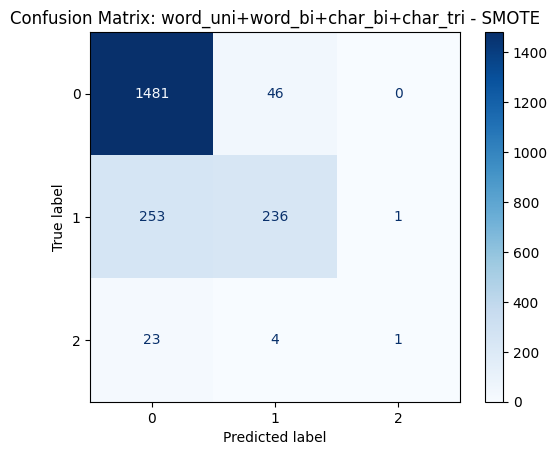

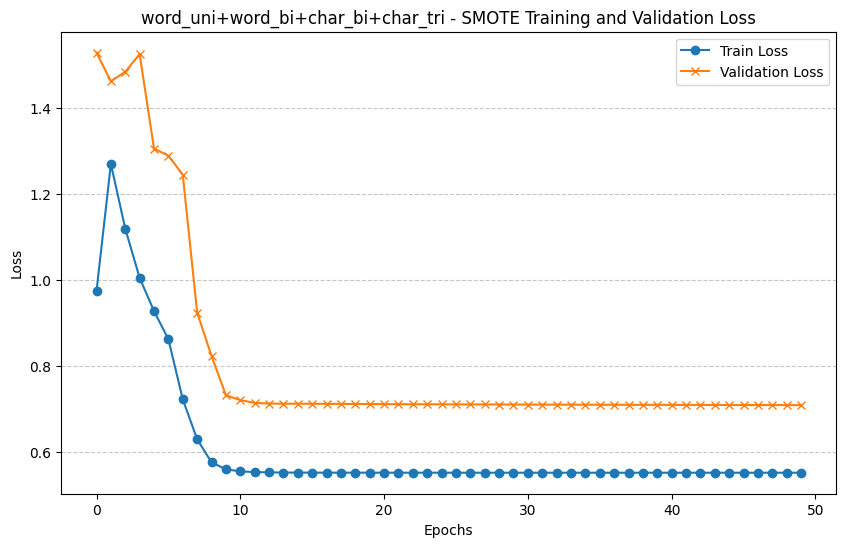

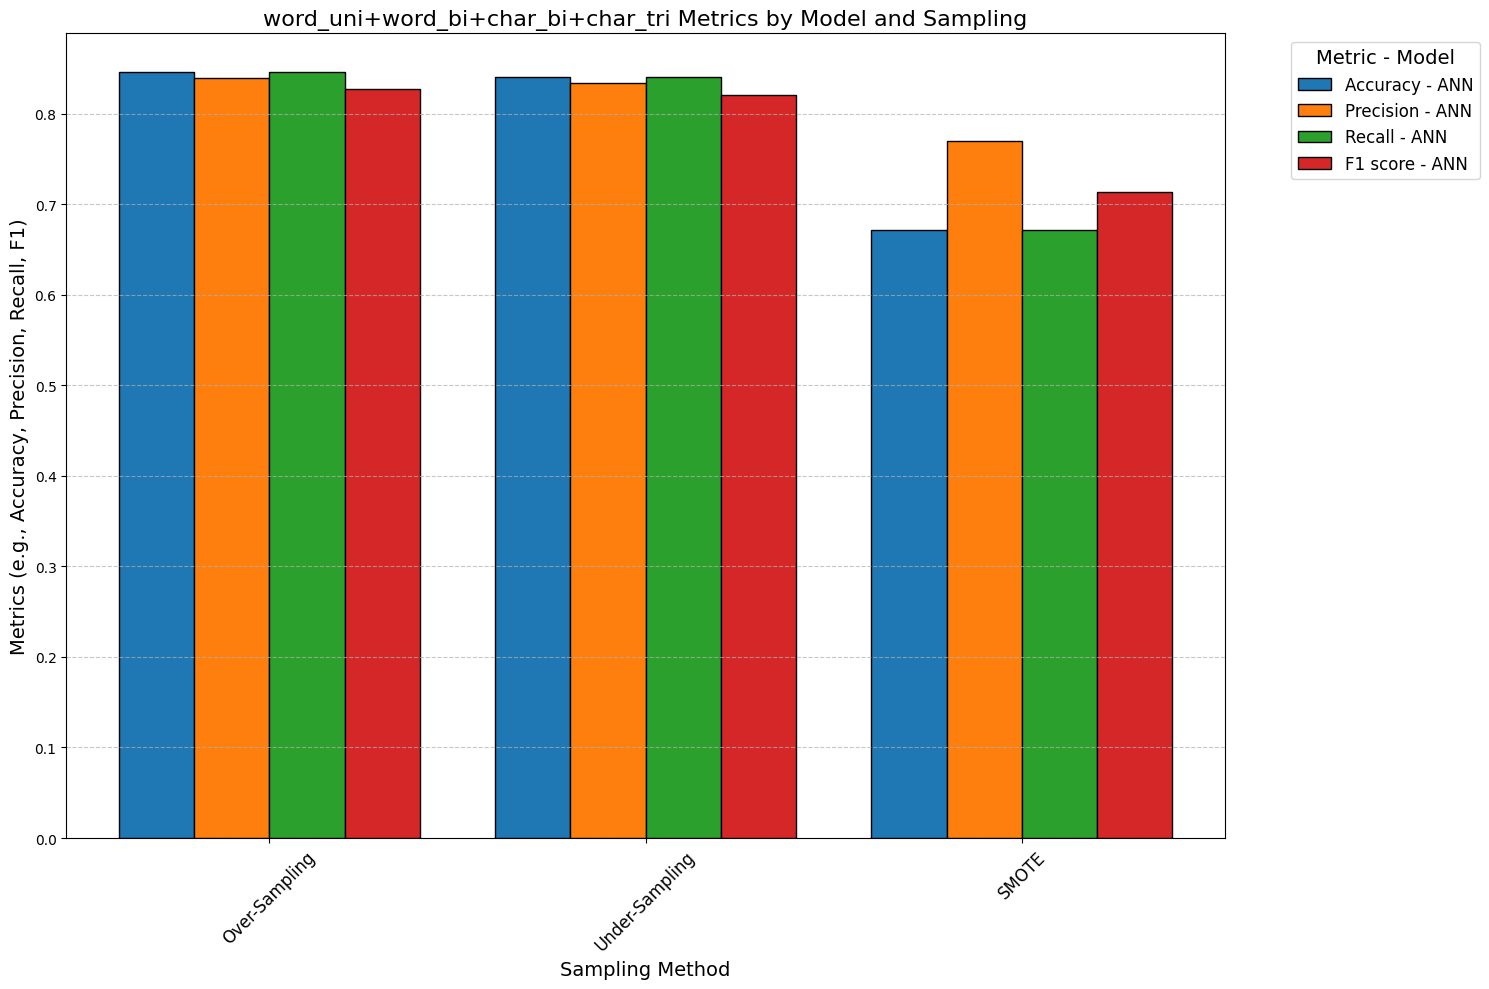

Results saved to models/word_uni+word_bi+char_bi+char_tri_results.csv


In [27]:
# word unigram + word bigram + char bigram + char trigram -------------------------------------------
feature_union = FeatureUnion([
    ("word_unigram_count", word_unigram_count),
    ("word_unigram_tfidf", word_unigram_tfidf),

    ("word_bigram_count", word_bigram_count),
    ("word_bigram_tfidf", word_bigram_tfidf),

    ("char_bigram_count", char_bigram_count),
    ("char_bigram_tfidf", char_bigram_tfidf),

    ("char_trigram_count", char_trigram_count),
    ("char_trigram_tfidf", char_trigram_tfidf)

])
samplings,X_train_features,X_test_features,y_train_s=make_sampling(feature_union,X_train,X_test,y_train)


results_df = model_training(
                            "word_uni+word_bi+char_bi+char_tri",
                              X_train, X_test,
                              y_train_s, y_test,
                              samplings,
                              X_train_features,X_test_features,
                              len_labels
                              )
del samplings, X_train_features, X_test_features, y_train_s
result_dic["word_uni+word_bi+char_bi+char_tri"] = results_df

In [28]:
clear_memory()

Cleared memory.
now memory used: 753.96 MB


In [29]:
print(result_dic)

{'Word_Unigram':   model        sampling  accuracy  precision    recall  f1_score
0   ANN   Over-Sampling  0.831785   0.812738  0.831785  0.818247
1   ANN  Under-Sampling  0.336919   0.765574  0.336919  0.439420
2   ANN           SMOTE  0.821516   0.803255  0.821516  0.801002, 'Word_bigram':   model        sampling  accuracy  precision    recall  f1_score
0   ANN   Over-Sampling  0.779462   0.804769  0.779462  0.711491
1   ANN  Under-Sampling  0.116870   0.747970  0.116870  0.172459
2   ANN           SMOTE  0.805868   0.808736  0.805868  0.767354, 'char_bigram':   model        sampling  accuracy  precision    recall  f1_score
0   ANN   Over-Sampling  0.401467   0.726349  0.401467  0.469805
1   ANN  Under-Sampling  0.525672   0.721264  0.525672  0.584431
2   ANN           SMOTE  0.598044   0.771160  0.598044  0.624450, 'char_trigram':   model        sampling  accuracy  precision    recall  f1_score
0   ANN   Over-Sampling  0.832763   0.818674  0.832763  0.823198
1   ANN  Under-Sampling 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dictionary_to_dataframe(result_dic):
    """
    Converts a dictionary into a DataFrame and adds the gram_name as a column.

    Parameters:
        result_dic (dict): Dictionary containing results with gram_name as keys.

    Returns:
        pd.DataFrame: Combined DataFrame with gram_name as a column.
    """
    dataframes = []

    for gram_name, metrics in result_dic.items():
        temp_df = metrics.copy()  # Already a DataFrame
        temp_df.insert(0, 'gram_name', gram_name)
        dataframes.append(temp_df)

    return pd.concat(dataframes, ignore_index=True)

def visualize_metrics(result_dic):
    """
    Visualizes the metrics from a dictionary using grouped bar charts.

    Parameters:
        result_dic (dict): Dictionary containing results with gram_name as keys.

    Returns:
        None: Displays the visualization.
    """
    # Convert dictionary to DataFrame
    final_df = dictionary_to_dataframe(result_dic)

    # Group by gram_name and calculate mean scores
    grouped_df = final_df.groupby(['gram_name', 'sampling']).mean(numeric_only=True).reset_index()

    # Metrics to plot (dynamic based on available columns)
    available_metrics = [col for col in grouped_df.columns if col not in ['gram_name', 'sampling', 'model']]

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(14, 8))

    # Number of gram names and metrics
    gram_sampling_labels = grouped_df[['gram_name', 'sampling']].apply(lambda x: f"{x['gram_name']}\n({x['sampling']})", axis=1)
    x = np.arange(len(gram_sampling_labels))  # The label locations
    width = 0.15  # Adjusted width for more metrics

    # Plot each metric as a separate set of bars
    for i, metric in enumerate(available_metrics):
        ax.bar(x + i * width, grouped_df[metric], width, label=metric.capitalize())

    # Add labels, title, and legend
    ax.set_xlabel('Gram Name and Sampling Method')
    ax.set_ylabel('Score')
    ax.set_title('Mean Scores by Gram Name, Sampling Method, and Metric')
    ax.set_xticks(x + width * len(available_metrics) / 2)
    ax.set_xticklabels(gram_sampling_labels, rotation=45, ha='right')
    ax.legend()

    # Add spacing between groups
    plt.tight_layout()
    plt.show()


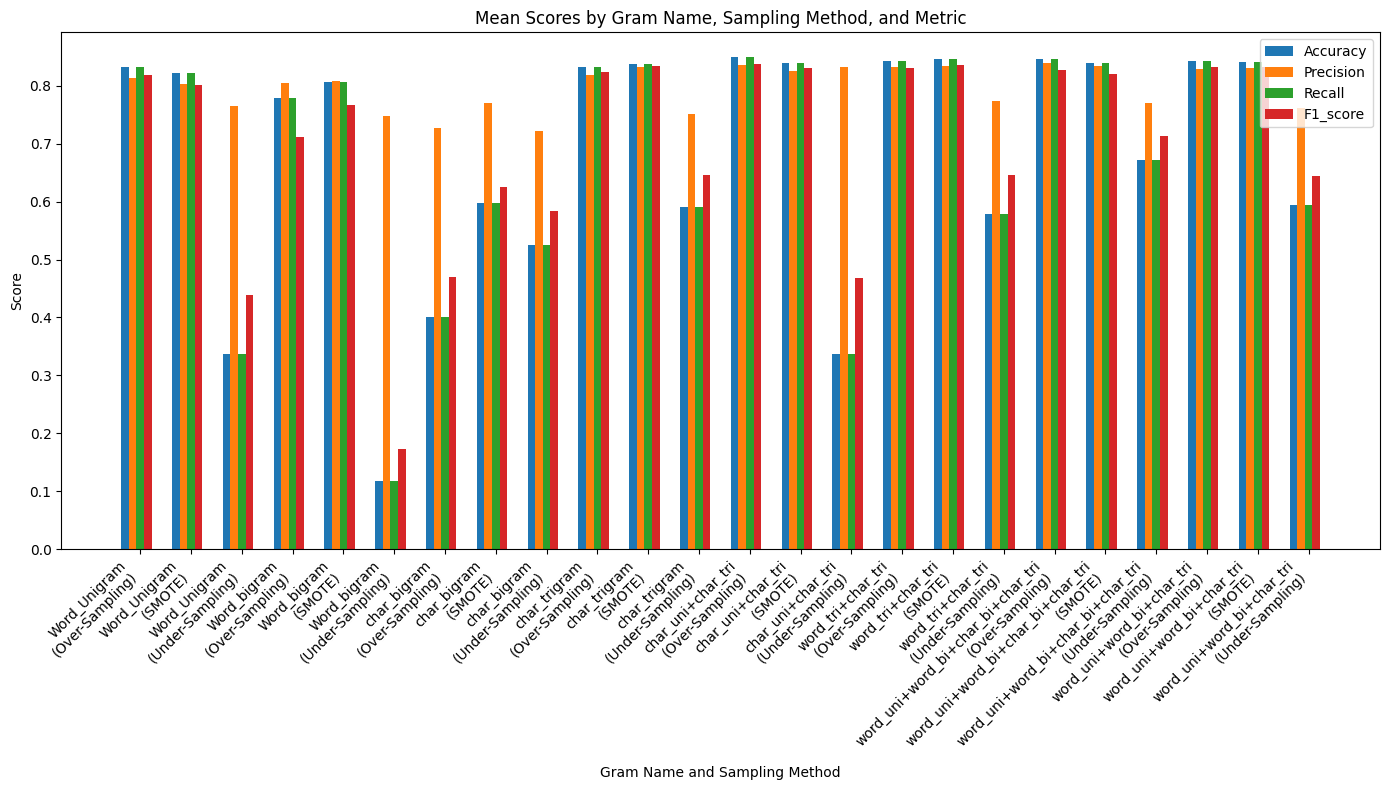

In [35]:
visualize_metrics(result_dic)